In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import prince

C:\Users\rana_\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import pyreadstat

In [4]:
data= pd.read_spss(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\transfer_5102413_files_9f16a9f8\science and you\export_SPSS Science&You - France métropolitaine - shared_1.sav")

In [5]:
data

Version       Sexe  AgeREP        RECO_Age           Departement  \
0     Version A  Une femme    20.0       18-24 ans    Nouvelle-Aquitaine   
1     Version A  Une femme    74.0  65 ans et plus  Auvergne-Rhône-Alpes   
2     Version A   Un homme    67.0  65 ans et plus  Auvergne-Rhône-Alpes   
3     Version A   Un homme    49.0       45-54 ans              Bretagne   
4     Version A   Un homme    60.0       55-64 ans  Auvergne-Rhône-Alpes   
...         ...        ...     ...             ...                   ...   
3028  Version B   Un homme    31.0       25-34 ans         Île-de-France   
3029  Version B  Une femme    47.0       45-54 ans         Île-de-France   
3030  Version B  Une femme    43.0       35-44 ans              Bretagne   
3031  Version B  Une femme    25.0       25-34 ans             Normandie   
3032  Version B  Une femme    39.0       35-44 ans         Île-de-France   

                         TailleCommune                TypeMenage  \
0     5 - De 20 000 à 49 999 habitants       Seul(e) sans enfant   
1        7 - 100 000 habitants et plus       Seul(e) sans enfant   
2       2 - De 2 000 à 4 999 habitants     En couple sans enfant   
3       2 - De 2 000 à 4 999 habitants  En couple avec enfant(s)   
4        7 - 100 000 habitants et plus       Seul(e) sans enfant   
...                                ...                       ...   
3028  5 - De 20 000 à 49 999 habitants       Seul(e) sans enfant   
3029    2 - De 2 000 à 4 999 habitants  En couple avec enfant(s)   
3030    3 - De 5 000 à 9 999 habitants  En couple avec enfant(s)   
3031      1 - Moins de 2 000 habitants  En couple avec enfant(s)   
3032  6 - De 50 000 à 99 999 habitants  En couple avec enfant(s)   

                                             SitPro  \
0         Etudiant(e) dans l'enseignement supérieur   
1                                       Retraité(e)   
2                                       Retraité(e)   
3     En activité professionnelle (salariée ou non)   
4     En activité professionnelle (salariée ou non)   
...                                             ...   
3028  En activité professionnelle (salariée ou non)   
3029  En activité professionnelle (salariée ou non)   
3030  En activité professionnelle (salariée ou non)   
3031  En activité professionnelle (salariée ou non)   
3032             En congé parental, congé maternité   

                                                    CSP  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                   Profession libérale   
4     Cadre d'entreprise, cadre administratif, comme...   
...                                                 ...   
3028  Cadre d'entreprise, cadre administratif, comme...   
3029                                Employé de commerce   
3030  Employé de la fonction publique, agent de serv...   
3031        Technicien, contremaître, agent de maîtrise   
3032  Cadre d'entreprise, cadre administratif, comme...   

                                               RECO_CSP PersonneRef  \
0                                       Autres inactifs         NaN   
1                                             Retraités         NaN   
2                                             Retraités         Non   
3     Cadres et professions intellectuelles supérieures         Oui   
4     Cadres et professions intellectuelles supérieures         NaN   
...                                                 ...         ...   
3028  Cadres et professions intellectuelles supérieures         NaN   
3029                                           Employés         Non   
3030                                           Employés         Non   
3031                         Professions intermédiaires         Non   
3032  Cadres et professions intellectuelles supérieures         Oui   

                                      SitProPersRef  Ag

In [6]:
list(data.columns.values.tolist())

['Version',
 'Sexe',
 'AgeREP',
 'RECO_Age',
 'Departement',
 'TailleCommune',
 'TypeMenage',
 'SitPro',
 'CSP',
 'RECO_CSP',
 'PersonneRef',
 'SitProPersRef',
 'AgePersRef',
 'SexePersRef',
 'Diplome',
 'CSPConjoint',
 'NivDiplome',
 'InteretNvelleTechno',
 'InformNvelleTechno',
 'enthousiasmNvelleTechno',
 'PolitiqueScience',
 'RecherchEnvironment',
 'RecherchHommeSociet',
 'ConqutEspace',
 'RechercheMedicale',
 'Realisations_techniques',
 'ArtMusique',
 'Sport',
 'RecherchesVie',
 'Intelligence_Artificelle',
 'ArticleScience',
 'DiscussionScience',
 'DebatPublic',
 'SignerPetition',
 'ExperienceScienceParticipative',
 'FacsinBeautNaturel',
 'ElectriciteLac',
 'Existentiel',
 'Entrepreneur',
 'RecherchScientifiq',
 'ConfianceScience',
 'ScientifiquesUniversitairesConfiance',
 'ScientifiquesIndustrieConfiance',
 'IngenieursConfiance',
 'PoliticiensConfiance',
 'JuristesConfiance',
 'journalistesConfiance',
 'IntellectuelsConfiance',
 'LeadersReligieuxConfiance',
 'OMSConfiance',
 'Min

In [7]:
# remove special character
data.columns=data.columns.str.replace('_','')
print(data.columns)

Index(['Version', 'Sexe', 'AgeREP', 'RECOAge', 'Departement', 'TailleCommune',
       'TypeMenage', 'SitPro', 'CSP', 'RECOCSP',
       ...
       'SitProAutre', 'CSPAutre', 'CSPLib', 'SitProPersRefAutre', 'CSPLib1',
       'CSPConjointAutre', 'DecrirScience', 'TypeFormation1Autre',
       'ReligionAutre', 'PratiqueManqueWhy'],
      dtype='object', length=232)


In [119]:
# Items 17: Pour chacun des domaines suivants, les informations les concernant vous intéressent-elles ?
Items17 = ['PolitiqueScience',
 'RecherchEnvironment',
 'RecherchHommeSociet',
 'ConqutEspace',
 'RechercheMedicale',
 'Realisationstechniques',
 'ArtMusique',
 'Sport',
 'RecherchesVie',
 'IntelligenceArtificelle']

In [120]:
for i in data[Items17].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout', 'Un peu' ,'Beaucoup','Sans opinion'], 
                            ordered=True)


In [121]:
# Application de l'ACM
acm_items17 = prince.MCA(n_components = 2)

acm_items17 = acm_items17.fit(data[Items17])

ax = acm_items17.plot(X=data[Items17])
ax



alt.Chart(...)

In [128]:
acm_v17 =acm_items17.column_coordinates(data[Items17])
acm_v17

0         1
PolitiqueScience_Pas du tout         -0.067330  0.946321
PolitiqueScience_Un peu              -0.226743 -0.194219
PolitiqueScience_Beaucoup            -0.421891 -1.094856
PolitiqueScience_Sans opinion         2.073146 -0.184315
RecherchEnvironment_Pas du tout       0.013267  1.520192
RecherchEnvironment_Un peu           -0.013612  0.315844
RecherchEnvironment_Beaucoup         -0.273175 -0.520031
RecherchEnvironment_Sans opinion      3.828839 -0.449176
RecherchHommeSociet_Pas du tout      -0.043747  1.198441
RecherchHommeSociet_Un peu           -0.168971  0.047990
RecherchHommeSociet_Beaucoup         -0.367154 -0.829901
RecherchHommeSociet_Sans opinion      2.735353 -0.286029
ConqutEspace_Pas du tout             -0.024328  0.792467
ConqutEspace_Un peu                  -0.159961 -0.061707
ConqutEspace_Beaucoup                -0.344200 -0.677650
ConqutEspace_Sans opinion             2.931748 -0.463498
RechercheMedicale_Pas du tout        -0.048659  1.757903
RechercheMedicale_Un peu              0.052061  0.404704
RechercheMedicale_Beaucoup           -0.247033 -0.491311
RechercheMedicale_Sans opinion        4.138142 -0.526529
Realisationstechniques_Pas du tout    0.053863  1.273898
Realisationstechniques_Un peu        -0.118811  0.055995
Realisationstechniques_Beaucoup      -0.345282 -0.705846
Realisationstechniques_Sans opinion   3.075253 -0.441477
ArtMusique_Pas du tout               -0.104493  0.857188
ArtMusique_Un peu                    -0.096728  0.020798
ArtMusique_Beaucoup                  -0.257121 -0.431725
ArtMusique_Sans opinion               2.876075 -0.374379
Sport_Pas du tout                    -0.074849  0.410488
Sport_Un peu                         -0.130244 -0.097542
Sport_Beaucoup                       -0.197371 -0.285934
Sport_Sans opinion                    2.949710 -0.516777
RecherchesVie_Pas du tout             0.009216  1.775095
RecherchesVie_Un peu                 -0.040217  0.417685
RecherchesVie_Beaucoup               -0.295917 -0.624810
RecherchesVie_Sans opinion            3.289949 -0.338379
IntelligenceArtificelle_Pas du tout   0.016084  0.959362
IntelligenceArtificelle_Un peu       -0.166839 -0.044668
IntelligenceArtificelle_Beaucoup     -0.330112 -0.749925
IntelligenceArtificelle_Sans opinion  2.965991 -0.339558

In [130]:
acm_v17.rename(columns = {0:'Compoenent 0(16.19%)', 1 : 'Componenet 1(11.09%)'}, inplace = True)
acm_v17
acm_v17 = acm_v17.reset_index()
acm_v17.columns = ['Variable', 'Compoenent 0(16.19%)' , 'Componenet 1(11.09%)']
acm_v17


Variable  Compoenent 0(16.19%)  \
0           PolitiqueScience_Pas du tout             -0.067330   
1                PolitiqueScience_Un peu             -0.226743   
2              PolitiqueScience_Beaucoup             -0.421891   
3          PolitiqueScience_Sans opinion              2.073146   
4        RecherchEnvironment_Pas du tout              0.013267   
5             RecherchEnvironment_Un peu             -0.013612   
6           RecherchEnvironment_Beaucoup             -0.273175   
7       RecherchEnvironment_Sans opinion              3.828839   
8        RecherchHommeSociet_Pas du tout             -0.043747   
9             RecherchHommeSociet_Un peu             -0.168971   
10          RecherchHommeSociet_Beaucoup             -0.367154   
11      RecherchHommeSociet_Sans opinion              2.735353   
12              ConqutEspace_Pas du tout             -0.024328   
13                   ConqutEspace_Un peu             -0.159961   
14                 ConqutEspace_Beaucoup             -0.344200   
15             ConqutEspace_Sans opinion              2.931748   
16         RechercheMedicale_Pas du tout             -0.048659   
17              RechercheMedicale_Un peu              0.052061   
18            RechercheMedicale_Beaucoup             -0.247033   
19        RechercheMedicale_Sans opinion              4.138142   
20    Realisationstechniques_Pas du tout              0.053863   
21         Realisationstechniques_Un peu             -0.118811   
22       Realisationstechniques_Beaucoup             -0.345282   
23   Realisationstechniques_Sans opinion              3.075253   
24                ArtMusique_Pas du tout             -0.104493   
25                     ArtMusique_Un peu             -0.096728   
26                   ArtMusique_Beaucoup             -0.257121   
27               ArtMusique_Sans opinion              2.876075   
28                     Sport_Pas du tout             -0.074849   
29                          Sport_Un peu             -0.130244   
30                        Sport_Beaucoup             -0.197371   
31                    Sport_Sans opinion              2.949710   
32             RecherchesVie_Pas du tout              0.009216   
33                  RecherchesVie_Un peu             -0.040217   
34                RecherchesVie_Beaucoup             -0.295917   
35            RecherchesVie_Sans opinion              3.289949   
36   IntelligenceArtificelle_Pas du tout              0.016084   
37        IntelligenceArtificelle_Un peu             -0.166839   
38      IntelligenceArtificelle_Beaucoup             -0.330112   
39  IntelligenceArtificelle_Sans opinion              2.965991   

    Componenet 1(11.09%)  
0               0.946321  
1              -0.194219  
2              -1.094856  
3              -0.184315  
4               1.520192  
5               0.315844  
6              -0.520031  
7              -0.449176  
8               1.198441  
9               0.047990  
10             -0.829901  
11             -0.286029  
12              0.792467  
13             -0.061707  
14             -0.677650  
15             -0.463498  
16              1.757903  
17              0.404704  
18             -0.491311  
19             -0.526529  
20              1.273898  
21              0.055995  
22             -0.705846  
23             -0.441477  
24              0.857188  
25              0.020798  
26             -0.431725  
27             -0.374379  
28              0.410488  
29             -0.097542  
30             -0.285934  
31             -0.516777  
32              1.775095  
33              0.417685  
34             -0.624810  
35             -0.338379  
36              0.959362  
37             -0.044668  
38             -0.749925  
39             -0.339558

Text(0.5, 1.0, "ACM d'Items 17")

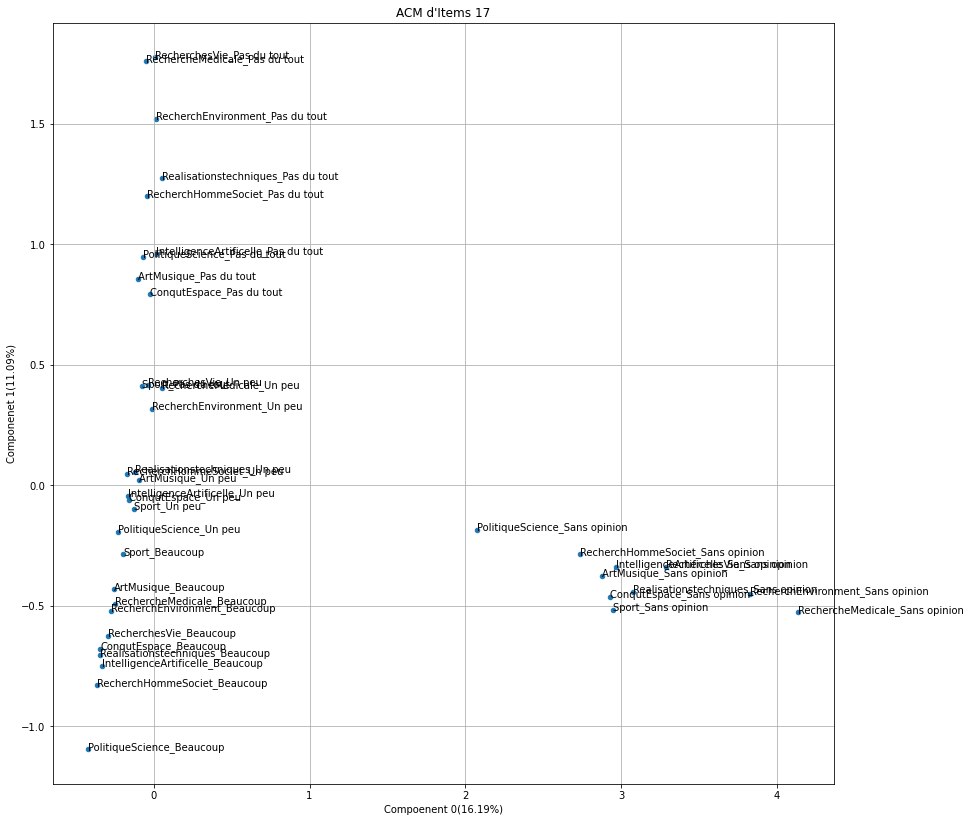

In [131]:
#ACM Items 17

#create scatter plot 
plt.rcParams['figure.figsize'] = [14, 14]
x= acm_v17['Compoenent 0(16.19%)']
y= acm_v17['Componenet 1(11.09%)']
ax = acm_v17.plot(kind='scatter', x='Compoenent 0(16.19%)', y='Componenet 1(11.09%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v17['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 17")    



In [132]:
# Analyse de l'ACM d'Items17 sans les 'Sans opinion'
Items17_sansopinion = data[Items17]

Items17_sans_sansopinion = Items17_sansopinion[Items17_sansopinion.isin(['Pas du tout', 'Un peu' ,'Beaucoup'])]

In [133]:
Items17_sans_sansopinion.isna().sum()

PolitiqueScience           277
RecherchEnvironment        102
RecherchHommeSociet        205
ConqutEspace               164
RechercheMedicale           77
Realisationstechniques     149
ArtMusique                 150
Sport                      128
RecherchesVie              138
IntelligenceArtificelle    159
dtype: int64

In [134]:
# supprimer les valeures manquantes
Items17_sans_sansopinion.dropna(inplace= True)

In [135]:
for i in Items17_sans_sansopinion.columns:
    Items17_sans_sansopinion[i] = pd.Categorical(Items17_sans_sansopinion[i], 
                            categories=['Pas du tout', 'Un peu' ,'Beaucoup'] 
                                        , ordered=True)

In [136]:
# Application de l'ACM
acm_items17_sans_sansopinion = prince.MCA(n_components = 2)

acm_items17_sans_sansopinion = acm_items17_sans_sansopinion.fit(Items17_sans_sansopinion)

ax = acm_items17_sans_sansopinion.plot(X=Items17_sans_sansopinion)
ax


alt.Chart(...)

In [137]:
acm_v17_sans_sansopinion =acm_items17_sans_sansopinion.column_coordinates(Items17_sans_sansopinion)
acm_v17_sans_sansopinion.rename(columns = {0:'Compoenent 0(17.35%)', 1 : 'Componenet 1(10.49%)'}, inplace = True)

acm_v17_sans_sansopinion = acm_v17_sans_sansopinion.reset_index()
acm_v17_sans_sansopinion.columns = ['Variable', 'Compoenent 0(17.35%)' , 'Componenet 1(10.49%)']
acm_v17_sans_sansopinion

Variable  Compoenent 0(17.35%)  \
0          PolitiqueScience_Pas du tout              0.918755   
1               PolitiqueScience_Un peu             -0.194685   
2             PolitiqueScience_Beaucoup             -1.079146   
3       RecherchEnvironment_Pas du tout              1.534496   
4            RecherchEnvironment_Un peu              0.326032   
5          RecherchEnvironment_Beaucoup             -0.530758   
6       RecherchHommeSociet_Pas du tout              1.197384   
7            RecherchHommeSociet_Un peu              0.034341   
8          RecherchHommeSociet_Beaucoup             -0.826998   
9              ConqutEspace_Pas du tout              0.805737   
10                  ConqutEspace_Un peu             -0.076114   
11                ConqutEspace_Beaucoup             -0.692016   
12        RechercheMedicale_Pas du tout              1.710012   
13             RechercheMedicale_Un peu              0.421079   
14           RechercheMedicale_Beaucoup             -0.500367   
15   Realisationstechniques_Pas du tout              1.301196   
16        Realisationstechniques_Un peu              0.051087   
17      Realisationstechniques_Beaucoup             -0.699143   
18               ArtMusique_Pas du tout              0.844890   
19                    ArtMusique_Un peu              0.000306   
20                  ArtMusique_Beaucoup             -0.442817   
21                    Sport_Pas du tout              0.403932   
22                         Sport_Un peu             -0.116231   
23                       Sport_Beaucoup             -0.319194   
24            RecherchesVie_Pas du tout              1.812432   
25                 RecherchesVie_Un peu              0.416995   
26               RecherchesVie_Beaucoup             -0.624412   
27  IntelligenceArtificelle_Pas du tout              0.987227   
28       IntelligenceArtificelle_Un peu             -0.069436   
29     IntelligenceArtificelle_Beaucoup             -0.738267   

    Componenet 1(10.49%)  
0               0.298339  
1              -0.459943  
2               0.861425  
3               1.280092  
4              -0.469607  
5               0.218401  
6               0.659120  
7              -0.453832  
8               0.549058  
9               0.215659  
10             -0.408177  
11              0.494472  
12              1.656972  
13             -0.478976  
14              0.202943  
15              0.639963  
16             -0.442770  
17              0.452165  
18              0.370820  
19             -0.329142  
20              0.289013  
21              0.115294  
22             -0.206726  
23              0.147369  
24              1.545623  
25             -0.536992  
26              0.296936  
27              0.351481  
28             -0.451378  
29              0.557650

Text(0.5, 1.0, "ACM d'Items 17 sans les personnes ayant répondu sans opinion")

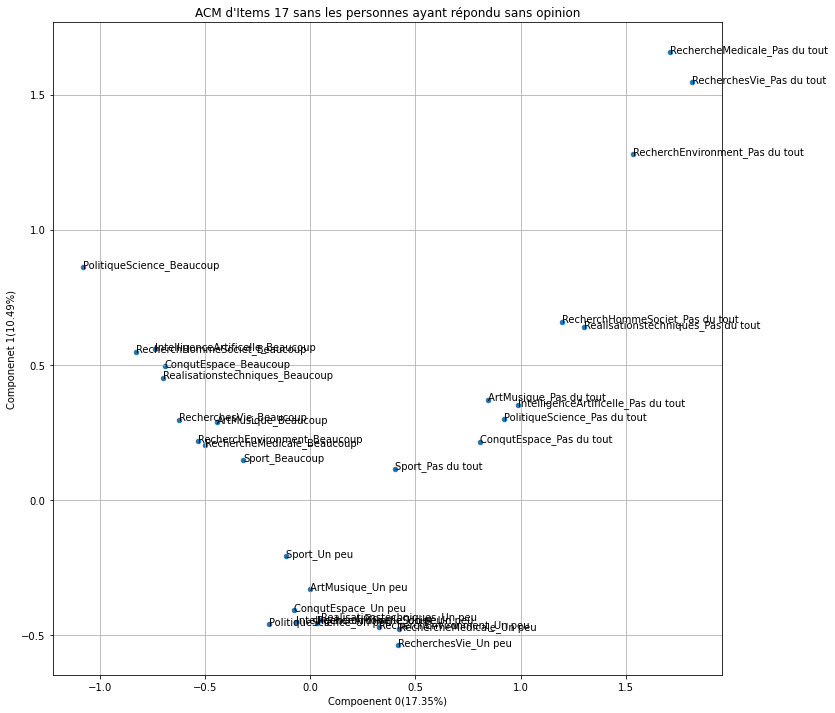

In [138]:
#ACM Items 17 sans les sans opinion

#create scatter plot
plt.rcParams['figure.figsize'] = [12, 12]
x= acm_v17_sans_sansopinion['Compoenent 0(17.35%)']
y= acm_v17_sans_sansopinion['Componenet 1(10.49%)']
ax = acm_v17_sans_sansopinion.plot(kind='scatter', x='Compoenent 0(17.35%)', y='Componenet 1(10.49%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v17_sans_sansopinion['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 17 sans les personnes ayant répondu sans opinion")   

In [139]:
#Items 22: A l’occasion de la crise du coronavirus, on a beaucoup parlé des « fakes news » ou des infos des fausses informations. 
#Dans quelle mesure faites-vous confiance aux personnes suivantes pour vous dire la vérité sur le coronavirus ? 
Items22=['ScientifiquesUniversitairesConfiance','ScientifiquesIndustrieConfiance','IngenieursConfiance'
               ,'PoliticiensConfiance','JuristesConfiance','journalistesConfiance','IntellectuelsConfiance'
               ,'LeadersReligieuxConfiance','OMSConfiance','MinistreSanteConfiance','MedecinConfiance']


In [140]:
for i in data[Items22].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout', 'Un peu' 
                                        , 'Beaucoup', 'Sans opinion'] 
                                        , ordered=True)

In [141]:
# Application de l'ACM
acm_items22 = prince.MCA(n_components = 2)

acm_items22 = acm_items22.fit(data[Items22])
ax = acm_items22.plot(X=data[Items22])
ax


alt.Chart(...)

In [142]:
acm_v22 =acm_items42.column_coordinates(data[Items22])
acm_v22.rename(columns = {0:'Compoenent 0(18.19%)', 1 : 'Componenet 1(12.31%)'}, inplace = True)

acm_v22 = acm_v22.reset_index()
acm_v22.columns = ['Variable', 'Compoenent 0(18.19%)' , 'Componenet 1(12.31%)']
acm_v22

Variable  Compoenent 0(18.19%)  \
0    ScientifiquesUniversitairesConfiance_Pas du tout              0.252804   
1         ScientifiquesUniversitairesConfiance_Un peu             -0.050899   
2       ScientifiquesUniversitairesConfiance_Beaucoup             -0.232936   
3   ScientifiquesUniversitairesConfiance_Sans opinion              1.443961   
4         ScientifiquesIndustrieConfiance_Pas du tout             -0.072459   
5              ScientifiquesIndustrieConfiance_Un peu             -0.071406   
6            ScientifiquesIndustrieConfiance_Beaucoup             -0.200516   
7        ScientifiquesIndustrieConfiance_Sans opinion              0.919612   
8                     IngenieursConfiance_Pas du tout              0.029949   
9                          IngenieursConfiance_Un peu             -0.091879   
10                       IngenieursConfiance_Beaucoup             -0.214285   
11                   IngenieursConfiance_Sans opinion              0.731725   
12                   PoliticiensConfiance_Pas du tout             -0.047580   
13                        PoliticiensConfiance_Un peu             -0.120376   
14                      PoliticiensConfiance_Beaucoup             -0.238173   
15                  PoliticiensConfiance_Sans opinion              1.363712   
16                      JuristesConfiance_Pas du tout             -0.077943   
17                           JuristesConfiance_Un peu             -0.087800   
18                         JuristesConfiance_Beaucoup             -0.182659   
19                     JuristesConfiance_Sans opinion              0.663924   
20                  journalistesConfiance_Pas du tout             -0.050668   
21                       journalistesConfiance_Un peu             -0.070707   
22                     journalistesConfiance_Beaucoup             -0.205017   
23                 journalistesConfiance_Sans opinion              1.126285   
24                 IntellectuelsConfiance_Pas du tout             -0.072395   
25                      IntellectuelsConfiance_Un peu             -0.088014   
26                    IntellectuelsConfiance_Beaucoup             -0.207124   
27                IntellectuelsConfiance_Sans opinion              0.924947   
28              LeadersReligieuxConfiance_Pas du tout             -0.119323   
29                   LeadersReligieuxConfiance_Un peu              0.107807   
30                 LeadersReligieuxConfiance_Beaucoup             -0.072283   
31             LeadersReligieuxConfiance_Sans opinion              0.696565   
32                           OMSConfiance_Pas du tout              0.068030   
33                                OMSConfiance_Un peu             -0.043844   
34                              OMSConfiance_Beaucoup             -0.203093   
35                          OMSConfiance_Sans opinion              1.653239   
36                 MinistreSanteConfiance_Pas du tout             -0.025502   
37                      MinistreSanteConfiance_Un peu             -0.046108   
38                    MinistreSanteConfiance_Beaucoup             -0.183100   
39                MinistreSanteConfiance_Sans opinion              1.528832   
40                       MedecinConfiance_Pas du tout              0.240126   
41                            MedecinConfiance_Un peu              0.013527   
42                          MedecinConfiance_Beaucoup             -0.145809   
43                      MedecinConfiance_Sans opinion              1.838895   

    Componenet 1(12.31%)  
0               0.551846  
1               0.033958  
2              -0.282097  
3               0.178121  
4               0.144574  
5              -0.080642  
6              -0.298345  
7              -0.002369  
8               0.223219  
9              -0.016652  
10             -0.285830  
11             -0.001150  
12              0.091389  
13             -0.197699  
14             -0.388211  
15             -0.100078  
16              0.138166  
17 

Text(0.5, 1.0, "ACM d'Items 22")

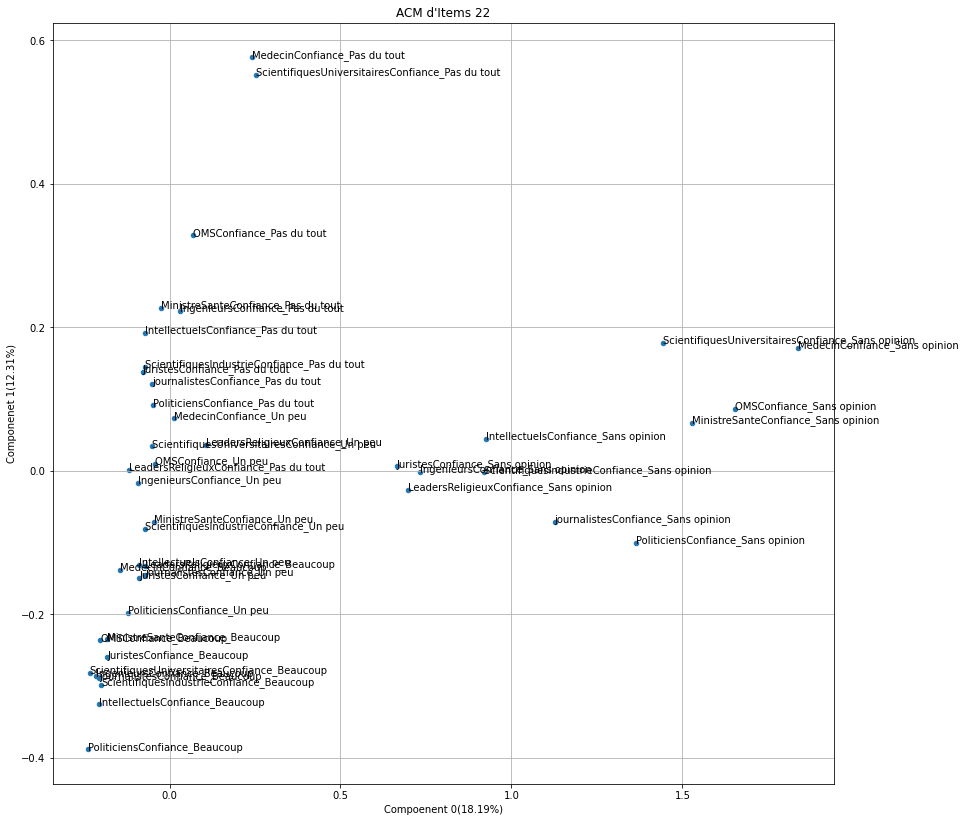

In [144]:
#ACM Items 22

#create scatter plot 
plt.rcParams['figure.figsize'] = [14, 14]
x= acm_v22['Compoenent 0(18.19%)']
y= acm_v22['Componenet 1(12.31%)']
ax = acm_v22.plot(kind='scatter', x='Compoenent 0(18.19%)', y='Componenet 1(12.31%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v22['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 22")    


In [145]:
# Analyse de l'ACM d'Items22 sans les 'Sans opinion'
Items22_sansopinion = data[Items22]

Items22_sans_sansopinion = Items22_sansopinion[Items22_sansopinion.isin(['Pas du tout', 'Un peu', 'Beaucoup'])]


In [147]:
Items22_sans_sansopinion.isna().sum()

ScientifiquesUniversitairesConfiance    150
ScientifiquesIndustrieConfiance         254
IngenieursConfiance                     301
PoliticiensConfiance                    150
JuristesConfiance                       355
journalistesConfiance                   165
IntellectuelsConfiance                  272
LeadersReligieuxConfiance               335
OMSConfiance                            124
MinistreSanteConfiance                  121
MedecinConfiance                         85
dtype: int64

In [148]:
# supprimer les valeures manquantes
Items22_sans_sansopinion.dropna(inplace= True)

In [149]:
for i in Items22_sans_sansopinion.columns:
    Items22_sans_sansopinion[i] = pd.Categorical(Items22_sans_sansopinion[i], 
                            categories=['Pas du tout', 'Un peu', 'Beaucoup'] 
                                        , ordered=True)

In [150]:
# Application de l'ACM
acm_items22_sans_sansopinion = prince.MCA(n_components = 2)

acm_items22_sans_sansopinion = acm_items22_sans_sansopinion.fit(Items22_sans_sansopinion)

ax = acm_items22_sans_sansopinion.plot(X=Items22_sans_sansopinion)
ax

alt.Chart(...)

In [151]:
acm_v22_sans_sansopinion =acm_items22_sans_sansopinion.column_coordinates(Items22_sans_sansopinion)
acm_v22_sans_sansopinion.rename(columns = {0:'Compoenent 0(19.17%)', 1 : 'Componenet 1(10.88%)'}, inplace = True)

acm_v22_sans_sansopinion = acm_v22_sans_sansopinion.reset_index()
acm_v22_sans_sansopinion.columns = ['Variable', 'Compoenent 0(19.17%)' , 'Componenet 1(10.88%)']
acm_v22_sans_sansopinion

Variable  Compoenent 0(19.17%)  \
0   ScientifiquesUniversitairesConfiance_Pas du tout             -1.266749   
1        ScientifiquesUniversitairesConfiance_Un peu             -0.189617   
2      ScientifiquesUniversitairesConfiance_Beaucoup              0.768883   
3        ScientifiquesIndustrieConfiance_Pas du tout             -0.645545   
4             ScientifiquesIndustrieConfiance_Un peu              0.374059   
5           ScientifiquesIndustrieConfiance_Beaucoup              1.255748   
6                    IngenieursConfiance_Pas du tout             -0.850825   
7                         IngenieursConfiance_Un peu              0.110378   
8                       IngenieursConfiance_Beaucoup              0.975553   
9                   PoliticiensConfiance_Pas du tout             -0.389941   
10                       PoliticiensConfiance_Un peu              0.846497   
11                     PoliticiensConfiance_Beaucoup              2.102261   
12                     JuristesConfiance_Pas du tout             -0.507337   
13                          JuristesConfiance_Un peu              0.440208   
14                        JuristesConfiance_Beaucoup              1.622950   
15                 journalistesConfiance_Pas du tout             -0.490892   
16                      journalistesConfiance_Un peu              0.569490   
17                    journalistesConfiance_Beaucoup              1.646225   
18                IntellectuelsConfiance_Pas du tout             -0.619668   
19                     IntellectuelsConfiance_Un peu              0.328196   
20                   IntellectuelsConfiance_Beaucoup              1.368234   
21             LeadersReligieuxConfiance_Pas du tout             -0.170927   
22                  LeadersReligieuxConfiance_Un peu              0.725219   
23                LeadersReligieuxConfiance_Beaucoup              1.692565   
24                          OMSConfiance_Pas du tout             -1.022384   
25                               OMSConfiance_Un peu             -0.086231   
26                             OMSConfiance_Beaucoup              0.823237   
27                MinistreSanteConfiance_Pas du tout             -0.816858   
28                     MinistreSanteConfiance_Un peu              0.140848   
29                   MinistreSanteConfiance_Beaucoup              1.166283   
30                      MedecinConfiance_Pas du tout             -1.536931   
31                           MedecinConfiance_Un peu             -0.414294   
32                         MedecinConfiance_Beaucoup              0.541871   

    Componenet 1(10.88%)  
0               0.959604  
1              -0.449932  
2               0.307540  
3               0.247204  
4              -0.477257  
5               1.088702  
6               0.477356  
7              -0.490068  
8               0.524379  
9               0.018279  
10             -0.286099  
11              2.490925  
12              0.191191  
13             -0.496240  
14              1.543724  
15              0.096718  
16             -0.372573  
17              1.765835  
18              0.222302  
19             -0.427335  
20              1.195918  
21              0.006020  
22             -0.292070  
23              1.816960  
24              0.673981  
25             -0.463484  
26              0.312024  
27              0.342182  
28             -0.492969  
29              0.697552  
30              1.595000  
31             -0.374894  
32              0.155748

Text(0.5, 1.0, "ACM d'Items 22 sans les personnes ayant répondu sans opinion")

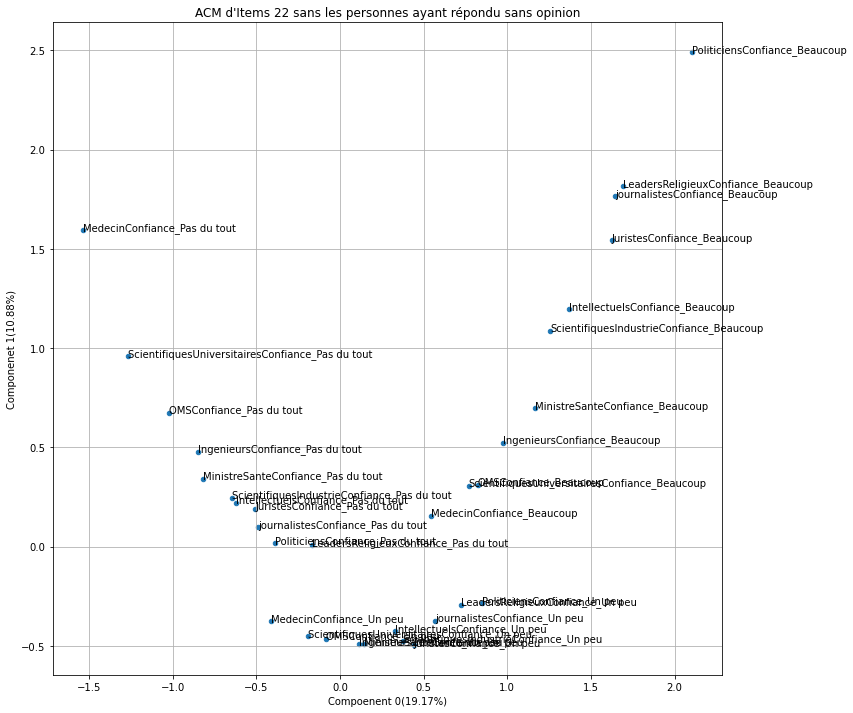

In [152]:
#ACM Items 22 sans les sans opinion

#create scatter plot
plt.rcParams['figure.figsize'] = [12, 12]
x= acm_v22_sans_sansopinion['Compoenent 0(19.17%)']
y= acm_v22_sans_sansopinion['Componenet 1(10.88%)']
ax = acm_v22_sans_sansopinion.plot(kind='scatter', x='Compoenent 0(19.17%)', y='Componenet 1(10.88%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v22_sans_sansopinion['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 22 sans les personnes ayant répondu sans opinion")   

In [8]:
# Items 23: Question : A quel point, avez-vous confiance dans l’avis scientifique des catégories de personnes suivantes,
#  à propos de la Covid 19 ?
Items23 = ['ScientifiquesScSocialesConfiance', 'VirologueConfiance', 'EconomistesConfiance'
           , 'ExpertsSantPubliqConfiance', 'EpidemiologiConfiance', 'GeneticiensConfiance']

In [9]:
data['ScientifiquesScSocialesConfiance'].dtype

CategoricalDtype(categories=['Beaucoup', 'Pas du tout', 'Sans opinion', 'Un peu'], ordered=False)

In [10]:
for i in data[Items23].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout', 'Un peu' 
                                        , 'Beaucoup', 'Sans opinion'] 
                                        , ordered=True)

In [11]:
# Application de l'ACM
acm_items23 = prince.MCA(n_components = 2)

acm_items23 = acm_items23.fit(data[Items23])


In [12]:
ax = acm_items23.plot(X=data[Items23])
ax

alt.Chart(...)

In [13]:
acm_v23 =acm_items23.column_coordinates(data[Items23])
acm_v23

0         1
ScientifiquesScSocialesConfiance_Pas du tout  -0.117863  1.056693
ScientifiquesScSocialesConfiance_Un peu       -0.195559 -0.087317
ScientifiquesScSocialesConfiance_Beaucoup     -0.360620 -1.025779
ScientifiquesScSocialesConfiance_Sans opinion  2.882839 -0.251334
VirologueConfiance_Pas du tout                -0.049923  2.380684
VirologueConfiance_Un peu                     -0.038025  0.487156
VirologueConfiance_Beaucoup                   -0.272789 -0.664070
VirologueConfiance_Sans opinion                4.833070 -0.457449
EconomistesConfiance_Pas du tout              -0.150568  0.510023
EconomistesConfiance_Un peu                   -0.273956 -0.369811
EconomistesConfiance_Beaucoup                 -0.396054 -1.147179
EconomistesConfiance_Sans opinion              2.369005 -0.289799
ExpertsSantPubliqConfiance_Pas du tout        -0.083646  1.611720
ExpertsSantPubliqConfiance_Un peu             -0.123292  0.130817
ExpertsSantPubliqConfiance_Beaucoup           -0.307714 -0.915448
ExpertsSantPubliqConfiance_Sans opinion        4.093630 -0.317641
EpidemiologiConfiance_Pas du tout             -0.068999  2.116737
EpidemiologiConfiance_Un peu                  -0.045971  0.449753
EpidemiologiConfiance_Beaucoup                -0.277822 -0.704796
EpidemiologiConfiance_Sans opinion             4.719710 -0.435807
GeneticiensConfiance_Pas du tout              -0.069691  1.798942
GeneticiensConfiance_Un peu                   -0.112285  0.270326
GeneticiensConfiance_Beaucoup                 -0.325162 -0.775376
GeneticiensConfiance_Sans opinion              3.399493 -0.313938

In [14]:
acm_v23.rename(columns = {0:'Compoenent 0', 1 : 'Componenet 1'}, inplace = True)

acm_v23 = acm_v23.reset_index()

In [15]:
acm_v23.columns = ['Variable', 'Compoenent 0(22.85%)' , 'Componenet 1(18.80%)']
acm_v23

Variable  Compoenent 0(22.85%)  \
0    ScientifiquesScSocialesConfiance_Pas du tout             -0.117863   
1         ScientifiquesScSocialesConfiance_Un peu             -0.195559   
2       ScientifiquesScSocialesConfiance_Beaucoup             -0.360620   
3   ScientifiquesScSocialesConfiance_Sans opinion              2.882839   
4                  VirologueConfiance_Pas du tout             -0.049923   
5                       VirologueConfiance_Un peu             -0.038025   
6                     VirologueConfiance_Beaucoup             -0.272789   
7                 VirologueConfiance_Sans opinion              4.833070   
8                EconomistesConfiance_Pas du tout             -0.150568   
9                     EconomistesConfiance_Un peu             -0.273956   
10                  EconomistesConfiance_Beaucoup             -0.396054   
11              EconomistesConfiance_Sans opinion              2.369005   
12         ExpertsSantPubliqConfiance_Pas du tout             -0.083646   
13              ExpertsSantPubliqConfiance_Un peu             -0.123292   
14            ExpertsSantPubliqConfiance_Beaucoup             -0.307714   
15        ExpertsSantPubliqConfiance_Sans opinion              4.093630   
16              EpidemiologiConfiance_Pas du tout             -0.068999   
17                   EpidemiologiConfiance_Un peu             -0.045971   
18                 EpidemiologiConfiance_Beaucoup             -0.277822   
19             EpidemiologiConfiance_Sans opinion              4.719710   
20               GeneticiensConfiance_Pas du tout             -0.069691   
21                    GeneticiensConfiance_Un peu             -0.112285   
22                  GeneticiensConfiance_Beaucoup             -0.325162   
23              GeneticiensConfiance_Sans opinion              3.399493   

    Componenet 1(18.80%)  
0               1.056693  
1              -0.087317  
2              -1.025779  
3              -0.251334  
4               2.380684  
5               0.487156  
6              -0.664070  
7              -0.457449  
8               0.510023  
9              -0.369811  
10             -1.147179  
11             -0.289799  
12              1.611720  
13              0.130817  
14             -0.915448  
15             -0.317641  
16              2.116737  
17              0.449753  
18             -0.704796  
19             -0.435807  
20              1.798942  
21              0.270326  
22             -0.775376  
23             -0.313938

Text(0.5, 1.0, "ACM d'Items 23")

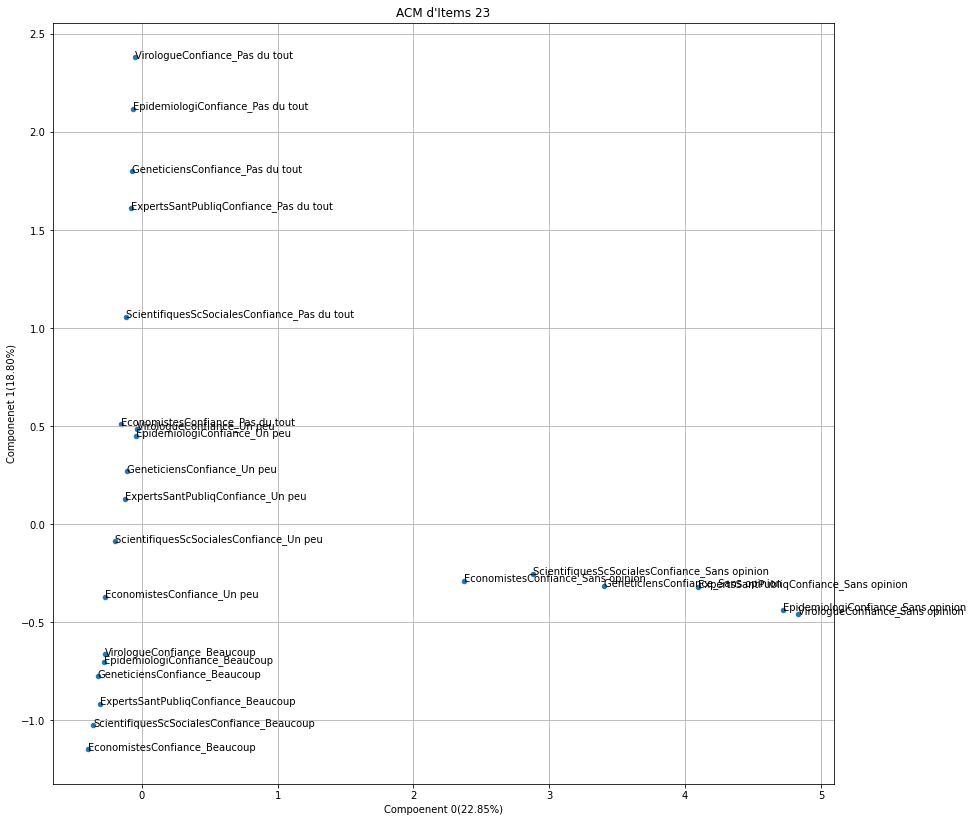

In [16]:
#ACM Items 22

#create scatter plot 
plt.rcParams['figure.figsize'] = [14, 14]
x= acm_v23['Compoenent 0(22.85%)']
y= acm_v23['Componenet 1(18.80%)']
ax = acm_v23.plot(kind='scatter', x='Compoenent 0(22.85%)', y='Componenet 1(18.80%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v23['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 23")    


In [17]:
Items23_sansopinion = data[Items23]

In [18]:
# Analyse de l'ACM d'Items23 sans les 'Sans opinion'

Items23_sans_sansopinion = Items23_sansopinion[Items23_sansopinion.isin(['Pas du tout', 'Un peu', 'Beaucoup'])]


Items23_sans_sansopinion

ScientifiquesScSocialesConfiance VirologueConfiance EconomistesConfiance  \
0                            Beaucoup           Beaucoup             Beaucoup   
1                            Beaucoup           Beaucoup             Beaucoup   
2                         Pas du tout             Un peu          Pas du tout   
3                            Beaucoup           Beaucoup               Un peu   
4                              Un peu             Un peu               Un peu   
...                               ...                ...                  ...   
3028                         Beaucoup           Beaucoup               Un peu   
3029                      Pas du tout        Pas du tout               Un peu   
3030                         Beaucoup             Un peu               Un peu   
3031                      Pas du tout        Pas du tout          Pas du tout   
3032                         Beaucoup             Un peu          Pas du tout   

     ExpertsSantPubliqConfiance EpidemiologiConfiance GeneticiensConfiance  
0                      Beaucoup              Beaucoup             Beaucoup  
1                      Beaucoup              Beaucoup             Beaucoup  
2                        Un peu                Un peu               Un peu  
3                        Un peu              Beaucoup             Beaucoup  
4                        Un peu                Un peu               Un peu  
...                         ...                   ...                  ...  
3028                   Beaucoup              Beaucoup             Beaucoup  
3029                Pas du tout                Un peu          Pas du tout  
3030                   Beaucoup              Beaucoup             Beaucoup  
3031                Pas du tout           Pas du tout          Pas du tout  
3032                   Beaucoup                Un peu               Un peu  

[3033 rows x 6 columns]

In [19]:
Items23_sans_sansopinion.isna().sum()

ScientifiquesScSocialesConfiance    204
VirologueConfiance                   98
EconomistesConfiance                257
ExpertsSantPubliqConfiance          126
EpidemiologiConfiance               102
GeneticiensConfiance                163
dtype: int64

In [20]:
# supprimer les valeures manquantes
Items23_sans_sansopinion.dropna(inplace= True)

In [21]:
Items23_sans_sansopinion

ScientifiquesScSocialesConfiance VirologueConfiance EconomistesConfiance  \
0                            Beaucoup           Beaucoup             Beaucoup   
1                            Beaucoup           Beaucoup             Beaucoup   
2                         Pas du tout             Un peu          Pas du tout   
3                            Beaucoup           Beaucoup               Un peu   
4                              Un peu             Un peu               Un peu   
...                               ...                ...                  ...   
3028                         Beaucoup           Beaucoup               Un peu   
3029                      Pas du tout        Pas du tout               Un peu   
3030                         Beaucoup             Un peu               Un peu   
3031                      Pas du tout        Pas du tout          Pas du tout   
3032                         Beaucoup             Un peu          Pas du tout   

     ExpertsSantPubliqConfiance EpidemiologiConfiance GeneticiensConfiance  
0                      Beaucoup              Beaucoup             Beaucoup  
1                      Beaucoup              Beaucoup             Beaucoup  
2                        Un peu                Un peu               Un peu  
3                        Un peu              Beaucoup             Beaucoup  
4                        Un peu                Un peu               Un peu  
...                         ...                   ...                  ...  
3028                   Beaucoup              Beaucoup             Beaucoup  
3029                Pas du tout                Un peu          Pas du tout  
3030                   Beaucoup              Beaucoup             Beaucoup  
3031                Pas du tout           Pas du tout          Pas du tout  
3032                   Beaucoup                Un peu               Un peu  

[2655 rows x 6 columns]

In [22]:
for i in Items23_sans_sansopinion.columns:
    Items23_sans_sansopinion[i] = pd.Categorical(Items23_sans_sansopinion[i], 
                            categories=['Pas du tout', 'Un peu' 
                                        , 'Beaucoup'] 
                                        , ordered=True)

In [23]:
# Application de l'ACM
acm_items23_sans_sansopinion = prince.MCA(n_components = 2)

acm_items23_sans_sansopinion = acm_items23_sans_sansopinion.fit(Items23_sans_sansopinion)


In [24]:
ax = acm_items23_sans_sansopinion.plot(X=Items23_sans_sansopinion)
ax

alt.Chart(...)

In [25]:
acm_v23_sans_sansopinion =acm_items23_sans_sansopinion.column_coordinates(Items23_sans_sansopinion)

In [26]:
acm_v23_sans_sansopinion

0         1
ScientifiquesScSocialesConfiance_Pas du tout  1.024920  0.455124
ScientifiquesScSocialesConfiance_Un peu      -0.106389 -0.456037
ScientifiquesScSocialesConfiance_Beaucoup    -1.018242  0.704122
VirologueConfiance_Pas du tout                2.323610  1.947385
VirologueConfiance_Un peu                     0.486751 -0.857971
VirologueConfiance_Beaucoup                  -0.665892  0.384205
EconomistesConfiance_Pas du tout              0.481406  0.106891
EconomistesConfiance_Un peu                  -0.378448 -0.299201
EconomistesConfiance_Beaucoup                -1.136337  0.887988
ExpertsSantPubliqConfiance_Pas du tout        1.579603  0.882897
ExpertsSantPubliqConfiance_Un peu             0.112892 -0.658991
ExpertsSantPubliqConfiance_Beaucoup          -0.910054  0.617240
EpidemiologiConfiance_Pas du tout             2.067507  1.615782
EpidemiologiConfiance_Un peu                  0.447218 -0.866911
EpidemiologiConfiance_Beaucoup               -0.708879  0.402977
GeneticiensConfiance_Pas du tout              1.741227  1.249506
GeneticiensConfiance_Un peu                   0.257457 -0.706961
GeneticiensConfiance_Beaucoup                -0.773415  0.477979

In [27]:
acm_v23_sans_sansopinion.rename(columns = {0:'Compoenent 0(28.78%)', 1 : 'Componenet 1(21.63%)'}, inplace = True)

acm_v23_sans_sansopinion = acm_v23_sans_sansopinion.reset_index()

In [28]:
acm_v23_sans_sansopinion.columns = ['Variable', 'Compoenent 0(28.78%)' , 'Componenet 1(21.63%)']
acm_v23_sans_sansopinion

Variable  Compoenent 0(28.78%)  \
0   ScientifiquesScSocialesConfiance_Pas du tout              1.024920   
1        ScientifiquesScSocialesConfiance_Un peu             -0.106389   
2      ScientifiquesScSocialesConfiance_Beaucoup             -1.018242   
3                 VirologueConfiance_Pas du tout              2.323610   
4                      VirologueConfiance_Un peu              0.486751   
5                    VirologueConfiance_Beaucoup             -0.665892   
6               EconomistesConfiance_Pas du tout              0.481406   
7                    EconomistesConfiance_Un peu             -0.378448   
8                  EconomistesConfiance_Beaucoup             -1.136337   
9         ExpertsSantPubliqConfiance_Pas du tout              1.579603   
10             ExpertsSantPubliqConfiance_Un peu              0.112892   
11           ExpertsSantPubliqConfiance_Beaucoup             -0.910054   
12             EpidemiologiConfiance_Pas du tout              2.067507   
13                  EpidemiologiConfiance_Un peu              0.447218   
14                EpidemiologiConfiance_Beaucoup             -0.708879   
15              GeneticiensConfiance_Pas du tout              1.741227   
16                   GeneticiensConfiance_Un peu              0.257457   
17                 GeneticiensConfiance_Beaucoup             -0.773415   

    Componenet 1(21.63%)  
0               0.455124  
1              -0.456037  
2               0.704122  
3               1.947385  
4              -0.857971  
5               0.384205  
6               0.106891  
7              -0.299201  
8               0.887988  
9               0.882897  
10             -0.658991  
11              0.617240  
12              1.615782  
13             -0.866911  
14              0.402977  
15              1.249506  
16             -0.706961  
17              0.477979

Text(0.5, 1.0, "ACM d'Items 23 sans les personnes ayant répondu sans opinion")

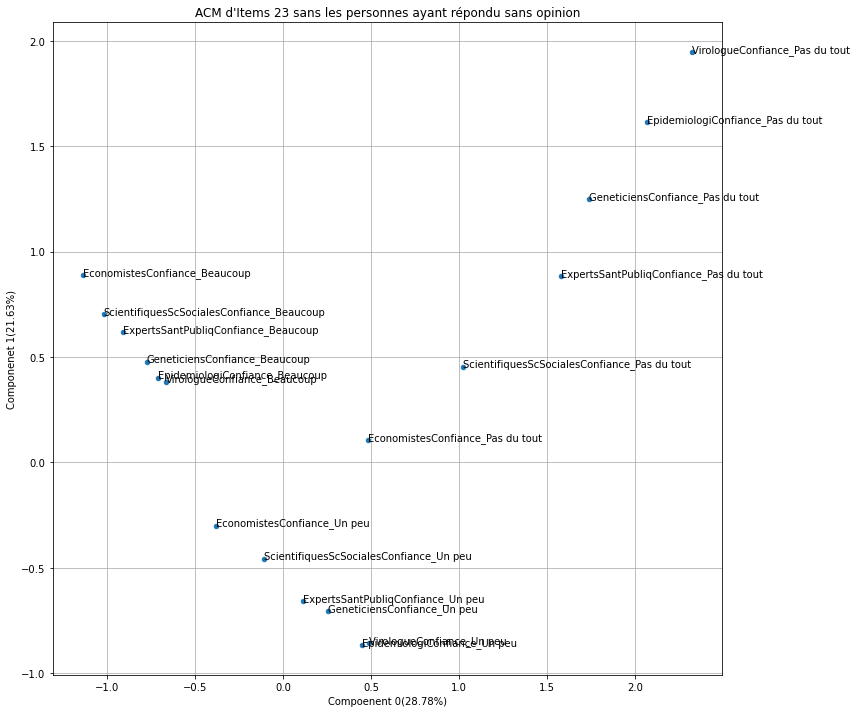

In [29]:
#ACM Items 23 sans les sans opinion

#create scatter plot
plt.rcParams['figure.figsize'] = [12, 12]
x= acm_v23_sans_sansopinion['Compoenent 0(28.78%)']
y= acm_v23_sans_sansopinion['Componenet 1(21.63%)']
ax = acm_v23_sans_sansopinion.plot(kind='scatter', x='Compoenent 0(28.78%)', y='Componenet 1(21.63%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v23_sans_sansopinion['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 23 sans les personnes ayant répondu sans opinion")    

In [30]:
# Items 31: A votre avis, pour chacun des domaines suivants, en France, est ce qu’il serait souhaitable d’augmenter les crédits de la recherche scientifique,
# de les diminuer ou de les laisser comme ils sont ?
Items31 = ['RecherchMedicCredit', 'NRJRenouvelablesCredit', 'TransportCredit'
           , 'ScienceHumaineSocialeCredit', 'RechercheGenetiqueCredit'
           , 'ApplicationNRJAtomiqueCredit', 'ConqueteEspaceCredit', 'AICredit']

In [31]:
data['RecherchMedicCredit'].dtype

CategoricalDtype(categories=['Augmenter', 'Diminuer', 'Laisser', 'Sans opinion'], ordered=False)

In [32]:
for i in data[Items23].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Diminuer', 'Laisser' 
                                        , 'Augmenter' , 'Sans opinion'] 
                                        , ordered=True)


In [33]:
# Application de l'ACM
acm_items31 = prince.MCA(n_components = 2)

acm_items31 = acm_items31.fit(data[Items31])


In [34]:
ax = acm_items31.plot(X=data[Items31])
ax

alt.Chart(...)

In [35]:
acm_v31 =acm_items31.column_coordinates(data[Items31])
acm_v31

0         1
RecherchMedicCredit_Augmenter             -0.144543  0.050949
RecherchMedicCredit_Diminuer              -0.200753  1.512760
RecherchMedicCredit_Laisser               -0.107408 -1.041942
RecherchMedicCredit_Sans opinion           3.941307  0.174832
NRJRenouvelablesCredit_Augmenter          -0.194177  0.162570
NRJRenouvelablesCredit_Diminuer           -0.277119  0.963677
NRJRenouvelablesCredit_Laisser            -0.171889 -0.923828
NRJRenouvelablesCredit_Sans opinion        3.446039  0.126888
TransportCredit_Augmenter                 -0.217132  0.397161
TransportCredit_Diminuer                  -0.236612  0.750308
TransportCredit_Laisser                   -0.238676 -0.616457
TransportCredit_Sans opinion               2.478723 -0.085535
ScienceHumaineSocialeCredit_Augmenter     -0.222671  0.687280
ScienceHumaineSocialeCredit_Diminuer      -0.314286  0.458328
ScienceHumaineSocialeCredit_Laisser       -0.252929 -0.635255
ScienceHumaineSocialeCredit_Sans opinion   2.234902 -0.026315
RechercheGenetiqueCredit_Augmenter        -0.236432  0.346251
RechercheGenetiqueCredit_Diminuer         -0.322224  0.744326
RechercheGenetiqueCredit_Laisser          -0.207021 -0.777452
RechercheGenetiqueCredit_Sans opinion      2.567016  0.027531
ApplicationNRJAtomiqueCredit_Augmenter    -0.281607  0.653554
ApplicationNRJAtomiqueCredit_Diminuer     -0.282301  0.463947
ApplicationNRJAtomiqueCredit_Laisser      -0.261808 -0.724159
ApplicationNRJAtomiqueCredit_Sans opinion  2.192088 -0.013768
ConqueteEspaceCredit_Augmenter            -0.307948  0.949899
ConqueteEspaceCredit_Diminuer             -0.236681  0.123109
ConqueteEspaceCredit_Laisser              -0.234313 -0.485686
ConqueteEspaceCredit_Sans opinion          2.163440  0.045044
AICredit_Augmenter                        -0.279216  0.691798
AICredit_Diminuer                         -0.244366  0.286785
AICredit_Laisser                          -0.226952 -0.625542
AICredit_Sans opinion                      2.181228  0.049130

In [36]:
acm_v31.rename(columns = {0:'Compoenent 0(19.39%)', 1 : 'Componenet 1(9.19%)'}, inplace = True)

acm_v31 = acm_v31.reset_index()
acm_v31.columns = ['Variable', 'Compoenent 0(19.39%)' , 'Componenet 1(9.19%)']
acm_v31

Variable  Compoenent 0(19.39%)  \
0               RecherchMedicCredit_Augmenter             -0.144543   
1                RecherchMedicCredit_Diminuer             -0.200753   
2                 RecherchMedicCredit_Laisser             -0.107408   
3            RecherchMedicCredit_Sans opinion              3.941307   
4            NRJRenouvelablesCredit_Augmenter             -0.194177   
5             NRJRenouvelablesCredit_Diminuer             -0.277119   
6              NRJRenouvelablesCredit_Laisser             -0.171889   
7         NRJRenouvelablesCredit_Sans opinion              3.446039   
8                   TransportCredit_Augmenter             -0.217132   
9                    TransportCredit_Diminuer             -0.236612   
10                    TransportCredit_Laisser             -0.238676   
11               TransportCredit_Sans opinion              2.478723   
12      ScienceHumaineSocialeCredit_Augmenter             -0.222671   
13       ScienceHumaineSocialeCredit_Diminuer             -0.314286   
14        ScienceHumaineSocialeCredit_Laisser             -0.252929   
15   ScienceHumaineSocialeCredit_Sans opinion              2.234902   
16         RechercheGenetiqueCredit_Augmenter             -0.236432   
17          RechercheGenetiqueCredit_Diminuer             -0.322224   
18           RechercheGenetiqueCredit_Laisser             -0.207021   
19      RechercheGenetiqueCredit_Sans opinion              2.567016   
20     ApplicationNRJAtomiqueCredit_Augmenter             -0.281607   
21      ApplicationNRJAtomiqueCredit_Diminuer             -0.282301   
22       ApplicationNRJAtomiqueCredit_Laisser             -0.261808   
23  ApplicationNRJAtomiqueCredit_Sans opinion              2.192088   
24             ConqueteEspaceCredit_Augmenter             -0.307948   
25              ConqueteEspaceCredit_Diminuer             -0.236681   
26               ConqueteEspaceCredit_Laisser             -0.234313   
27          ConqueteEspaceCredit_Sans opinion              2.163440   
28                         AICredit_Augmenter             -0.279216   
29                          AICredit_Diminuer             -0.244366   
30                           AICredit_Laisser             -0.226952   
31                      AICredit_Sans opinion              2.181228   

    Componenet 1(9.19%)  
0              0.050949  
1              1.512760  
2             -1.041942  
3              0.174832  
4              0.162570  
5              0.963677  
6             -0.923828  
7              0.126888  
8              0.397161  
9              0.750308  
10            -0.616457  
11            -0.085535  
12             0.687280  
13             0.458328  
14            -0.635255  
15            -0.026315  
16             0.346251  
17             0.744326  
18            -0.777452  
19             0.027531  
20             0.653554  
21             0.463947  
22            -0.724159  
23            -0.013768  
24             0.949899  
25             0.123109  
26            -0.485686  
27             0.045044  
28             0.691798  
29             0.286785  
30            -0.625542  
31             0.049130

Text(0.5, 1.0, "ACM d'Items 31")

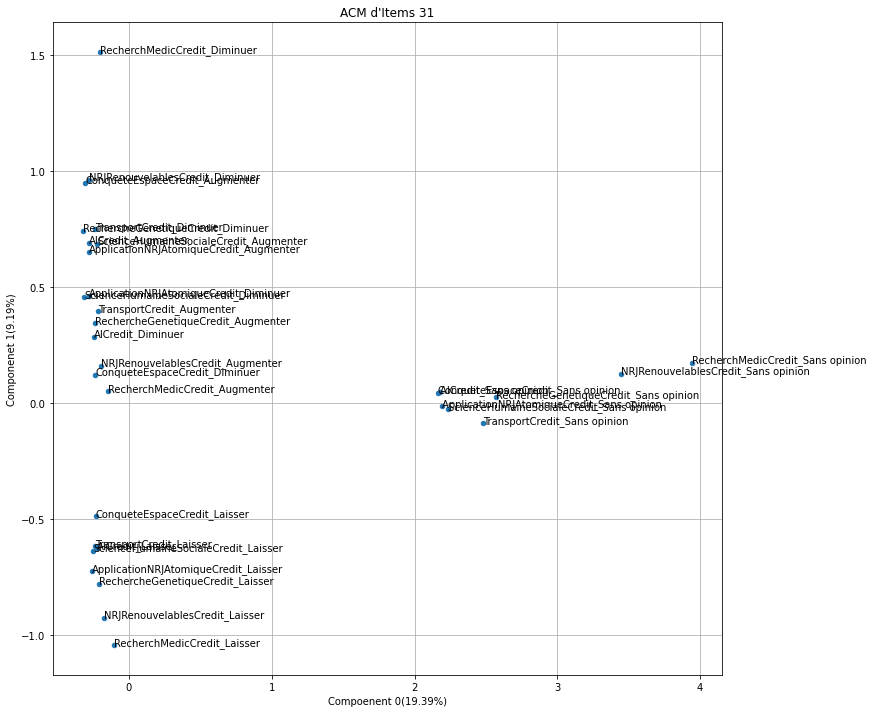

In [37]:
#ACM Items 31

#create scatter plot 
plt.rcParams['figure.figsize'] = [12, 12]
x= acm_v31['Compoenent 0(19.39%)']
y= acm_v31['Componenet 1(9.19%)']
ax = acm_v31.plot(kind='scatter', x='Compoenent 0(19.39%)', y='Componenet 1(9.19%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v31['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 31")    

In [58]:
# Analyse de l'ACM d'Items31 sans les 'Sans opinion'
Items31_sansopinion = data[Items31]

Items31_sans_sansopinion = Items31_sansopinion[Items31_sansopinion.isin(['Diminuer', 'Laisser', 'Augmenter'])]


Items31_sans_sansopinion

RecherchMedicCredit NRJRenouvelablesCredit TransportCredit  \
0              Augmenter              Augmenter         Laisser   
1              Augmenter              Augmenter         Laisser   
2              Augmenter                Laisser       Augmenter   
3              Augmenter                Laisser       Augmenter   
4              Augmenter              Augmenter       Augmenter   
...                  ...                    ...             ...   
3028           Augmenter                Laisser       Augmenter   
3029             Laisser              Augmenter        Diminuer   
3030           Augmenter                Laisser         Laisser   
3031           Augmenter              Augmenter        Diminuer   
3032           Augmenter              Augmenter       Augmenter   

     ScienceHumaineSocialeCredit RechercheGenetiqueCredit  \
0                      Augmenter                Augmenter   
1                      Augmenter                  Laisser   
2                       Diminuer                  Laisser   
3                        Laisser                Augmenter   
4                        Laisser                  Laisser   
...                          ...                      ...   
3028                   Augmenter                  Laisser   
3029                   Augmenter                Augmenter   
3030                     Laisser                  Laisser   
3031                    Diminuer                 Diminuer   
3032                    Diminuer                Augmenter   

     ApplicationNRJAtomiqueCredit ConqueteEspaceCredit   AICredit  
0                       Augmenter            Augmenter   Diminuer  
1                             NaN              Laisser        NaN  
2                         Laisser              Laisser  Augmenter  
3                       Augmenter             Diminuer    Laisser  
4                         Laisser             Diminuer    Laisser  
...                           ...                  ...        ...  
3028                      Laisser              Laisser  Augmenter  
3029                          NaN              Laisser    Laisser  
3030                     Diminuer             Diminuer   Diminuer  
3031                     Diminuer             Diminuer   Diminuer  
3032                      Laisser              Laisser  Augmenter  

[3033 rows x 8 columns]

In [39]:
Items31_sans_sansopinion.isna().sum()

RecherchMedicCredit             106
NRJRenouvelablesCredit          162
TransportCredit                 257
ScienceHumaineSocialeCredit     312
RechercheGenetiqueCredit        255
ApplicationNRJAtomiqueCredit    336
ConqueteEspaceCredit            311
AICredit                        308
dtype: int64

In [40]:
# supprimer les valeures manquantes
Items31_sans_sansopinion.dropna(inplace= True)

In [41]:
Items31_sans_sansopinion

RecherchMedicCredit NRJRenouvelablesCredit TransportCredit  \
0              Augmenter              Augmenter         Laisser   
2              Augmenter                Laisser       Augmenter   
3              Augmenter                Laisser       Augmenter   
4              Augmenter              Augmenter       Augmenter   
6                Laisser                Laisser         Laisser   
...                  ...                    ...             ...   
3027           Augmenter              Augmenter         Laisser   
3028           Augmenter                Laisser       Augmenter   
3030           Augmenter                Laisser         Laisser   
3031           Augmenter              Augmenter        Diminuer   
3032           Augmenter              Augmenter       Augmenter   

     ScienceHumaineSocialeCredit RechercheGenetiqueCredit  \
0                      Augmenter                Augmenter   
2                       Diminuer                  Laisser   
3                        Laisser                Augmenter   
4                        Laisser                  Laisser   
6                      Augmenter                Augmenter   
...                          ...                      ...   
3027                     Laisser                  Laisser   
3028                   Augmenter                  Laisser   
3030                     Laisser                  Laisser   
3031                    Diminuer                 Diminuer   
3032                    Diminuer                Augmenter   

     ApplicationNRJAtomiqueCredit ConqueteEspaceCredit   AICredit  
0                       Augmenter            Augmenter   Diminuer  
2                         Laisser              Laisser  Augmenter  
3                       Augmenter             Diminuer    Laisser  
4                         Laisser             Diminuer    Laisser  
6                       Augmenter              Laisser    Laisser  
...                           ...                  ...        ...  
3027                    Augmenter              Laisser   Diminuer  
3028                      Laisser              Laisser  Augmenter  
3030                     Diminuer             Diminuer   Diminuer  
3031                     Diminuer             Diminuer   Diminuer  
3032                      Laisser              Laisser  Augmenter  

[2318 rows x 8 columns]

In [42]:
Items31_sans_sansopinion['RecherchMedicCredit'].dtype

CategoricalDtype(categories=['Augmenter', 'Diminuer', 'Laisser', 'Sans opinion'], ordered=False)

In [43]:
for i in Items31_sans_sansopinion.columns:
    Items31_sans_sansopinion[i] = pd.Categorical(Items31_sans_sansopinion[i], 
                            categories=['Diminuer', 'Laisser', 'Augmenter'] 
                                        , ordered=True)

In [44]:
# Application de l'ACM
acm_items31_sans_sansopinion = prince.MCA(n_components = 2)

acm_items31_sans_sansopinion = acm_items31_sans_sansopinion.fit(Items31_sans_sansopinion)


In [45]:
ax = acm_items31_sans_sansopinion.plot(X=Items31_sans_sansopinion)
ax

alt.Chart(...)

In [46]:
acm_v31_sans_sansopinion =acm_items31_sans_sansopinion.column_coordinates(Items31_sans_sansopinion)

In [47]:
acm_v31_sans_sansopinion.rename(columns = {0:'Compoenent 0(14.34%)', 1 : 'Componenet 1(13.17%)'}, inplace = True)

acm_v31_sans_sansopinion = acm_v31_sans_sansopinion.reset_index()
acm_v31_sans_sansopinion.columns = ['Variable', 'Compoenent 0(14.34%)' , 'Componenet 1(13.17%)']
acm_v31_sans_sansopinion

Variable  Compoenent 0(14.34%)  \
0             RecherchMedicCredit_Diminuer              1.682677   
1              RecherchMedicCredit_Laisser             -1.007154   
2            RecherchMedicCredit_Augmenter              0.047996   
3          NRJRenouvelablesCredit_Diminuer              1.055349   
4           NRJRenouvelablesCredit_Laisser             -0.895534   
5         NRJRenouvelablesCredit_Augmenter              0.151536   
6                 TransportCredit_Diminuer              0.836240   
7                  TransportCredit_Laisser             -0.603783   
8                TransportCredit_Augmenter              0.328836   
9     ScienceHumaineSocialeCredit_Diminuer              0.494628   
10     ScienceHumaineSocialeCredit_Laisser             -0.625391   
11   ScienceHumaineSocialeCredit_Augmenter              0.641784   
12       RechercheGenetiqueCredit_Diminuer              0.792621   
13        RechercheGenetiqueCredit_Laisser             -0.750071   
14      RechercheGenetiqueCredit_Augmenter              0.299686   
15   ApplicationNRJAtomiqueCredit_Diminuer              0.504997   
16    ApplicationNRJAtomiqueCredit_Laisser             -0.693259   
17  ApplicationNRJAtomiqueCredit_Augmenter              0.558262   
18           ConqueteEspaceCredit_Diminuer              0.181899   
19            ConqueteEspaceCredit_Laisser             -0.500867   
20          ConqueteEspaceCredit_Augmenter              0.810132   
21                       AICredit_Diminuer              0.394906   
22                        AICredit_Laisser             -0.627503   
23                      AICredit_Augmenter              0.588369   

    Componenet 1(13.17%)  
0               2.386790  
1               0.877809  
2              -0.138166  
3               1.738805  
4               0.349673  
5              -0.226916  
6               0.978589  
7               0.006774  
8              -0.373529  
9               0.891031  
10             -0.043735  
11             -0.581120  
12              1.444346  
13              0.208712  
14             -0.442044  
15              0.634532  
16              0.033194  
17             -0.562275  
18              0.538060  
19             -0.150778  
20             -0.908706  
21              0.845683  
22             -0.019116  
23             -0.734816

Text(0.5, 1.0, "ACM d'Items 31 sans les personnes ayant répondu sans opinion")

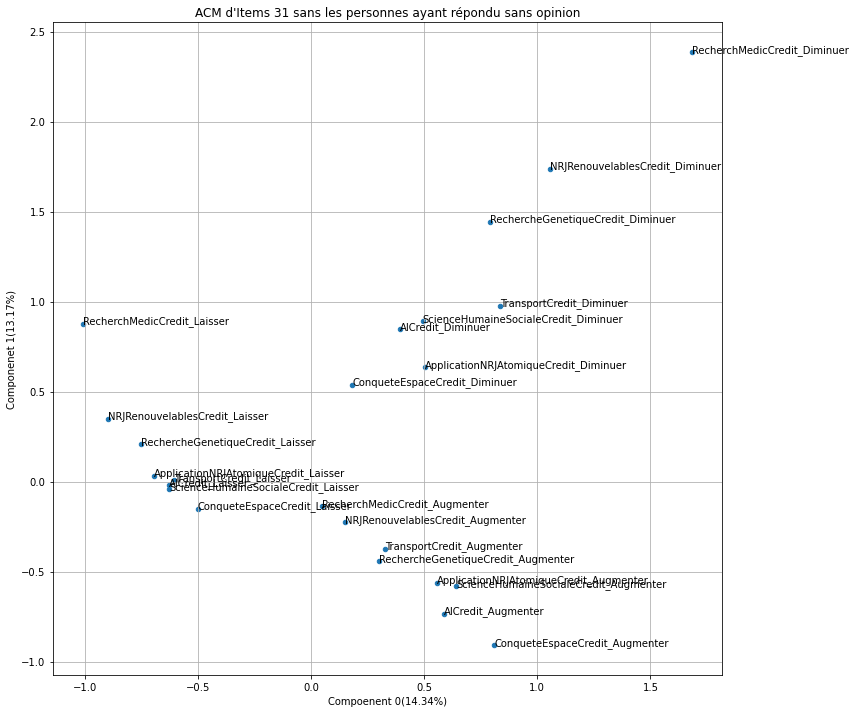

In [48]:
#ACM Items 31 sans les sans opinion

#create scatter plot
plt.rcParams['figure.figsize'] = [12, 12]
x= acm_v31_sans_sansopinion['Compoenent 0(14.34%)']
y= acm_v31_sans_sansopinion['Componenet 1(13.17%)']
ax = acm_v31_sans_sansopinion.plot(kind='scatter', x='Compoenent 0(14.34%)', y='Componenet 1(13.17%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v31_sans_sansopinion['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 31 sans les personnes ayant répondu sans opinion")   

In [49]:
# Items 32: Pour chacun des domaines suivants, avez-vous l’impression que le développement de la science et des techniques a eu jusqu’ à maintenant 
# des effets favorables ou non ?
Items32 = ['ConditionTravailEffet', 'SanteEffet', 'SensMoralEffet'
           , 'RapportentreGensEffet', 'EnvironnementEffet']

In [50]:
data['ConditionTravailEffet'].dtype

CategoricalDtype(categories=['Ni l'un ni l'autre', 'Plutôt défavorable',
                  'Plutôt favorable', 'Sans opinion'],
, ordered=False)

In [51]:
for i in data[Items32].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=["Plutôt défavorable", "Ni l'un ni l'autre"
                                        , "Plutôt favorable", "Sans opinion"] 
                                        , ordered=True)

In [52]:
# Application de l'ACM
acm_items32 = prince.MCA(n_components = 2)

acm_items32 = acm_items31.fit(data[Items32])


In [53]:
ax = acm_items32.plot(X=data[Items32])
ax

alt.Chart(...)

In [54]:
acm_v32 =acm_items32.column_coordinates(data[Items32])
acm_v32

0         1
ConditionTravailEffet_Plutôt défavorable -0.245423  1.196618
ConditionTravailEffet_Ni l'un ni l'autre -0.227556  0.019330
ConditionTravailEffet_Plutôt favorable   -0.228496 -0.595066
ConditionTravailEffet_Sans opinion        3.244621  0.082764
SanteEffet_Plutôt défavorable            -0.255398  1.507171
SanteEffet_Ni l'un ni l'autre            -0.230790  0.309600
SanteEffet_Plutôt favorable              -0.211056 -0.469813
SanteEffet_Sans opinion                   3.519835  0.065376
SensMoralEffet_Plutôt défavorable        -0.271990  0.999020
SensMoralEffet_Ni l'un ni l'autre        -0.257062 -0.230871
SensMoralEffet_Plutôt favorable          -0.277540 -1.366226
SensMoralEffet_Sans opinion               2.295855 -0.055882
RapportentreGensEffet_Plutôt défavorable -0.270294  0.946387
RapportentreGensEffet_Ni l'un ni l'autre -0.238663 -0.254245
RapportentreGensEffet_Plutôt favorable   -0.278627 -1.351590
RapportentreGensEffet_Sans opinion        2.826022 -0.029013
EnvironnementEffet_Plutôt défavorable    -0.249168  0.857813
EnvironnementEffet_Ni l'un ni l'autre    -0.210035 -0.009580
EnvironnementEffet_Plutôt favorable      -0.213644 -0.944448
EnvironnementEffet_Sans opinion           3.363844  0.066852

In [55]:
acm_v32.rename(columns = {0:'Compoenent 0(24.15%)', 1 : 'Componenet 1(16.72%)'}, inplace = True)

acm_v32 = acm_v32.reset_index()
acm_v32.columns = ['Variable', 'Compoenent 0(24.15%)' , 'Componenet 1(16.72%)']
acm_v32

Variable  Compoenent 0(24.15%)  \
0   ConditionTravailEffet_Plutôt défavorable             -0.245423   
1   ConditionTravailEffet_Ni l'un ni l'autre             -0.227556   
2     ConditionTravailEffet_Plutôt favorable             -0.228496   
3         ConditionTravailEffet_Sans opinion              3.244621   
4              SanteEffet_Plutôt défavorable             -0.255398   
5              SanteEffet_Ni l'un ni l'autre             -0.230790   
6                SanteEffet_Plutôt favorable             -0.211056   
7                    SanteEffet_Sans opinion              3.519835   
8          SensMoralEffet_Plutôt défavorable             -0.271990   
9          SensMoralEffet_Ni l'un ni l'autre             -0.257062   
10           SensMoralEffet_Plutôt favorable             -0.277540   
11               SensMoralEffet_Sans opinion              2.295855   
12  RapportentreGensEffet_Plutôt défavorable             -0.270294   
13  RapportentreGensEffet_Ni l'un ni l'autre             -0.238663   
14    RapportentreGensEffet_Plutôt favorable             -0.278627   
15        RapportentreGensEffet_Sans opinion              2.826022   
16     EnvironnementEffet_Plutôt défavorable             -0.249168   
17     EnvironnementEffet_Ni l'un ni l'autre             -0.210035   
18       EnvironnementEffet_Plutôt favorable             -0.213644   
19           EnvironnementEffet_Sans opinion              3.363844   

    Componenet 1(16.72%)  
0               1.196618  
1               0.019330  
2              -0.595066  
3               0.082764  
4               1.507171  
5               0.309600  
6              -0.469813  
7               0.065376  
8               0.999020  
9              -0.230871  
10             -1.366226  
11             -0.055882  
12              0.946387  
13             -0.254245  
14             -1.351590  
15             -0.029013  
16              0.857813  
17             -0.009580  
18             -0.944448  
19              0.066852

Text(0.5, 1.0, "ACM d'Items 32")

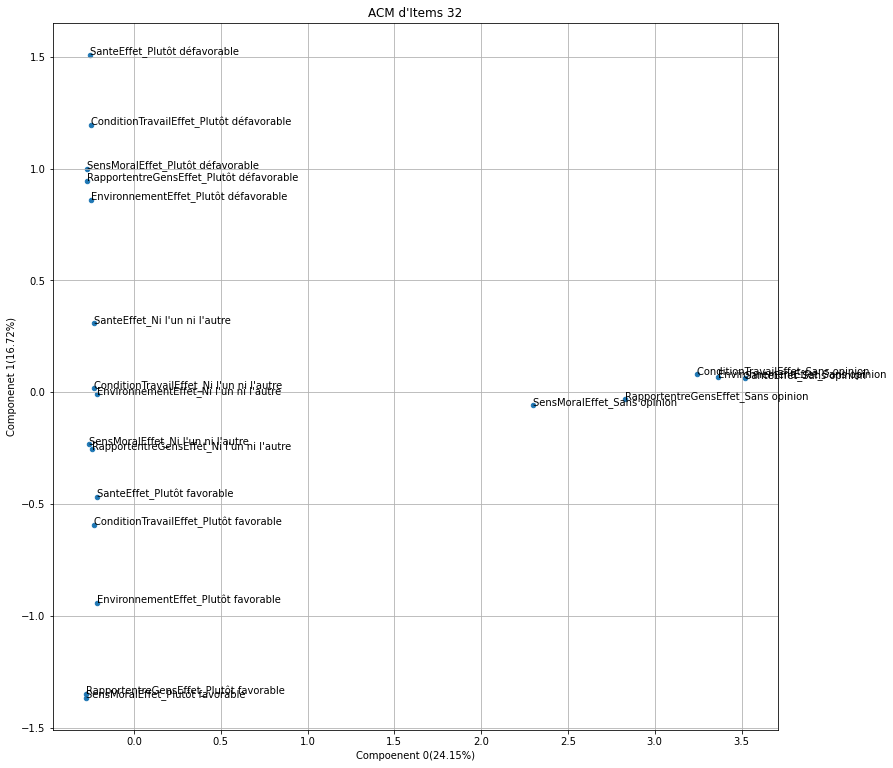

In [57]:
#ACM Items 32

#create scatter plot
plt.rcParams['figure.figsize'] = [13, 13]
x= acm_v32['Compoenent 0(24.15%)']
y= acm_v32['Componenet 1(16.72%)']
ax = acm_v32.plot(kind='scatter', x='Compoenent 0(24.15%)', y='Componenet 1(16.72%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v32['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 32")    

In [59]:
# Analyse de l'ACM d'Items32 sans les 'Sans opinion'
Items32_sansopinion = data[Items32]

Items32_sans_sansopinion = Items32_sansopinion[Items32_sansopinion.isin(["Plutôt défavorable"
                                                                         , "Ni l'un ni l'autre"
                                                                        , "Plutôt favorable"])]

Items32_sans_sansopinion

ConditionTravailEffet          SanteEffet      SensMoralEffet  \
0       Ni l'un ni l'autre  Plutôt défavorable  Ni l'un ni l'autre   
1         Plutôt favorable    Plutôt favorable  Ni l'un ni l'autre   
2         Plutôt favorable  Plutôt défavorable  Plutôt défavorable   
3       Ni l'un ni l'autre    Plutôt favorable  Ni l'un ni l'autre   
4       Plutôt défavorable  Plutôt défavorable  Plutôt défavorable   
...                    ...                 ...                 ...   
3028      Plutôt favorable  Plutôt défavorable  Plutôt défavorable   
3029    Ni l'un ni l'autre  Ni l'un ni l'autre  Plutôt défavorable   
3030    Ni l'un ni l'autre  Ni l'un ni l'autre  Ni l'un ni l'autre   
3031    Plutôt défavorable  Ni l'un ni l'autre  Ni l'un ni l'autre   
3032    Plutôt défavorable  Plutôt défavorable  Plutôt défavorable   

     RapportentreGensEffet  EnvironnementEffet  
0       Plutôt défavorable  Plutôt défavorable  
1                      NaN    Plutôt favorable  
2       Plutôt défavorable  Plutôt défavorable  
3       Ni l'un ni l'autre    Plutôt favorable  
4       Plutôt défavorable    Plutôt favorable  
...                    ...                 ...  
3028    Plutôt défavorable  Plutôt défavorable  
3029      Plutôt favorable    Plutôt favorable  
3030    Ni l'un ni l'autre    Plutôt favorable  
3031    Ni l'un ni l'autre                 NaN  
3032    Plutôt défavorable  Ni l'un ni l'autre  

[3033 rows x 5 columns]

In [60]:
Items32_sans_sansopinion.isna().sum()

ConditionTravailEffet    202
SanteEffet               180
SensMoralEffet           314
RapportentreGensEffet    252
EnvironnementEffet       190
dtype: int64

In [61]:
# supprimer les valeures manquantes
Items32_sans_sansopinion.dropna(inplace= True)

In [62]:
Items32_sans_sansopinion

ConditionTravailEffet          SanteEffet      SensMoralEffet  \
0       Ni l'un ni l'autre  Plutôt défavorable  Ni l'un ni l'autre   
2         Plutôt favorable  Plutôt défavorable  Plutôt défavorable   
3       Ni l'un ni l'autre    Plutôt favorable  Ni l'un ni l'autre   
4       Plutôt défavorable  Plutôt défavorable  Plutôt défavorable   
5       Ni l'un ni l'autre    Plutôt favorable  Ni l'un ni l'autre   
...                    ...                 ...                 ...   
3027    Ni l'un ni l'autre    Plutôt favorable  Ni l'un ni l'autre   
3028      Plutôt favorable  Plutôt défavorable  Plutôt défavorable   
3029    Ni l'un ni l'autre  Ni l'un ni l'autre  Plutôt défavorable   
3030    Ni l'un ni l'autre  Ni l'un ni l'autre  Ni l'un ni l'autre   
3032    Plutôt défavorable  Plutôt défavorable  Plutôt défavorable   

     RapportentreGensEffet  EnvironnementEffet  
0       Plutôt défavorable  Plutôt défavorable  
2       Plutôt défavorable  Plutôt défavorable  
3       Ni l'un ni l'autre    Plutôt favorable  
4       Plutôt défavorable    Plutôt favorable  
5       Ni l'un ni l'autre  Ni l'un ni l'autre  
...                    ...                 ...  
3027    Ni l'un ni l'autre    Plutôt favorable  
3028    Plutôt défavorable  Plutôt défavorable  
3029      Plutôt favorable    Plutôt favorable  
3030    Ni l'un ni l'autre    Plutôt favorable  
3032    Plutôt défavorable  Ni l'un ni l'autre  

[2575 rows x 5 columns]

In [63]:
Items32_sans_sansopinion['ConditionTravailEffet'].dtype

CategoricalDtype(categories=['Plutôt défavorable', 'Ni l'un ni l'autre',
                  'Plutôt favorable', 'Sans opinion'],
, ordered=True)

In [64]:
for i in Items32_sans_sansopinion.columns:
    Items32_sans_sansopinion[i] = pd.Categorical(Items32_sans_sansopinion[i], 
                            categories=["Plutôt défavorable", "Ni l'un ni l'autre", "Plutôt favorable"] 
                                        , ordered=True)

In [65]:
# Application de l'ACM
acm_items32_sans_sansopinion = prince.MCA(n_components = 2)

acm_items32_sans_sansopinion = acm_items32_sans_sansopinion.fit(Items32_sans_sansopinion)


In [66]:
ax = acm_items32_sans_sansopinion.plot(X=Items32_sans_sansopinion)
ax

alt.Chart(...)

In [67]:
acm_v32_sans_sansopinion =acm_items32_sans_sansopinion.column_coordinates(Items32_sans_sansopinion)

In [68]:
acm_v32_sans_sansopinion.rename(columns = {0:'Compoenent 0(25.64%)', 1 : 'Componenet 1(19.66%)'}, inplace = True)

acm_v32_sans_sansopinion = acm_v32_sans_sansopinion.reset_index()
acm_v32_sans_sansopinion.columns = ['Variable', 'Compoenent 0(25.64%)' , 'Componenet 1(19.66%)']
acm_v32_sans_sansopinion

Variable  Compoenent 0(25.64%)  \
0   ConditionTravailEffet_Plutôt défavorable              1.167065   
1   ConditionTravailEffet_Ni l'un ni l'autre              0.039170   
2     ConditionTravailEffet_Plutôt favorable             -0.582951   
3              SanteEffet_Plutôt défavorable              1.460412   
4              SanteEffet_Ni l'un ni l'autre              0.318588   
5                SanteEffet_Plutôt favorable             -0.460469   
6          SensMoralEffet_Plutôt défavorable              0.949700   
7          SensMoralEffet_Ni l'un ni l'autre             -0.220328   
8            SensMoralEffet_Plutôt favorable             -1.305401   
9   RapportentreGensEffet_Plutôt défavorable              0.906149   
10  RapportentreGensEffet_Ni l'un ni l'autre             -0.241628   
11    RapportentreGensEffet_Plutôt favorable             -1.310975   
12     EnvironnementEffet_Plutôt défavorable              0.839698   
13     EnvironnementEffet_Ni l'un ni l'autre             -0.002042   
14       EnvironnementEffet_Plutôt favorable             -0.921544   

    Componenet 1(19.66%)  
0               0.500578  
1              -0.815650  
2               0.485774  
3               0.811850  
4              -0.907875  
5               0.200602  
6               0.423906  
7              -0.586974  
8               1.041585  
9               0.415804  
10             -0.671462  
11              1.088378  
12              0.440498  
13             -0.861818  
14              0.411953

Text(0.5, 1.0, "ACM d'Items 32 sans les personnes ayant répondu sans opinion")

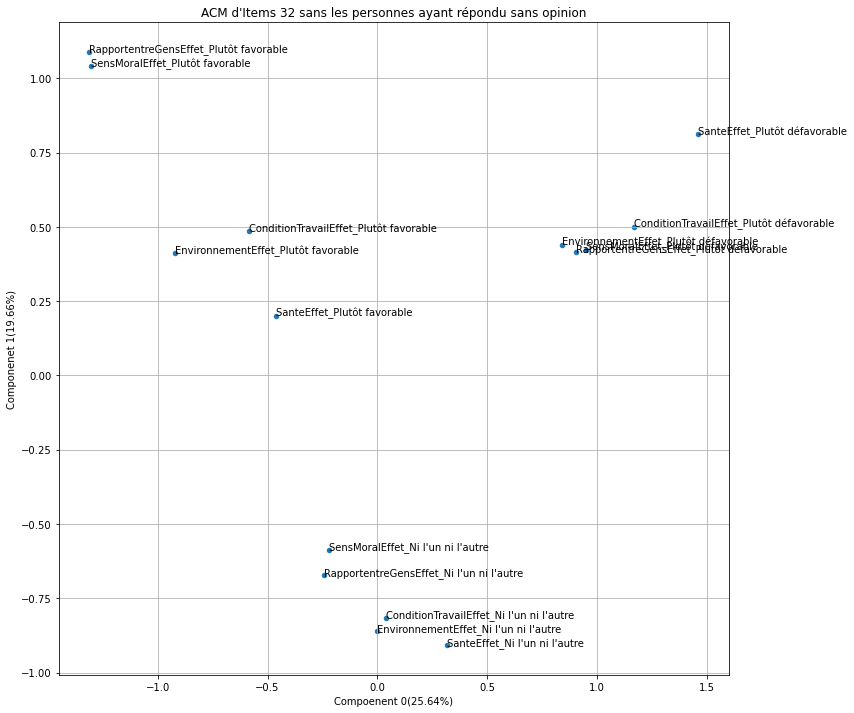

In [69]:
#ACM Items 32 sans les sans opinion

#create scatter plot of assists vs. points
plt.rcParams['figure.figsize'] = [12, 12]
x= acm_v32_sans_sansopinion['Compoenent 0(25.64%)']
y= acm_v32_sans_sansopinion['Componenet 1(19.66%)']
ax = acm_v32_sans_sansopinion.plot(kind='scatter', x='Compoenent 0(25.64%)', y='Componenet 1(19.66%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v32_sans_sansopinion['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 32 sans les personnes ayant répondu sans opinion")   

In [70]:
# Items 41: Voici une liste d’un certain nombre de pratiques souvent associées à la recherche individuelle du bien-être,
# à quelle fréquence y avez-vous recours ?
Items41 = ['AcuponctureFrequence', 'PhytotherapieFrequence', 'MeditationFrequence'
           , 'HypnoseFrequence', 'AstrologieFrequence', 'HomeopathieFrequence'
           , 'AromatherapieFrequence', 'TransmissionPenseeFrequence', 'PredictionsFrequence'
           , 'EnvoutementsFrequence', 'OsteoFrequence', 'YogaFrequence']

In [71]:
for i in data[Items41].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Jamais', 'Rarement', 'De temps en temps'
                                        , 'Souvent'] 
                                        , ordered=True)

In [80]:
# Application de l'ACM
acm_items41 = prince.MCA(n_components = 2)

acm_items41 = acm_items41.fit(data[Items41])


In [81]:
ax = acm_items41.plot(X=data[Items41])
ax

alt.Chart(...)

In [74]:
acm_v41 =acm_items41.column_coordinates(data[Items41])
acm_v41

0         1
AcuponctureFrequence_Jamais                   -0.346153  0.111603
AcuponctureFrequence_Rarement                  0.626313 -0.673839
AcuponctureFrequence_De temps en temps         1.230182 -0.368133
AcuponctureFrequence_Souvent                   2.453422  2.446623
PhytotherapieFrequence_Jamais                 -0.451938  0.159923
PhytotherapieFrequence_Rarement                0.456542 -0.826585
PhytotherapieFrequence_De temps en temps       1.001469 -0.440649
PhytotherapieFrequence_Souvent                 1.659017  1.334810
MeditationFrequence_Jamais                    -0.432019  0.125389
MeditationFrequence_Rarement                   0.379163 -0.740742
MeditationFrequence_De temps en temps          0.899127 -0.306948
MeditationFrequence_Souvent                    1.836953  1.412107
HypnoseFrequence_Jamais                       -0.253966  0.043885
HypnoseFrequence_Rarement                      1.014173 -0.646190
HypnoseFrequence_De temps en temps             1.559412 -0.330331
HypnoseFrequence_Souvent                       2.827177  2.953716
AstrologieFrequence_Jamais                    -0.299113  0.083422
AstrologieFrequence_Rarement                   0.337482 -0.367206
AstrologieFrequence_De temps en temps          0.707363 -0.334200
AstrologieFrequence_Souvent                    1.347215  1.173767
HomeopathieFrequence_Jamais                   -0.603341  0.386006
HomeopathieFrequence_Rarement                 -0.064981 -0.364036
HomeopathieFrequence_De temps en temps         0.480089 -0.549446
HomeopathieFrequence_Souvent                   1.304730  0.642412
AromatherapieFrequence_Jamais                 -0.485066  0.165054
AromatherapieFrequence_Rarement                0.437911 -0.761334
AromatherapieFrequence_De temps en temps       0.918874 -0.451406
AromatherapieFrequence_Souvent                 1.688984  1.171324
TransmissionPenseeFrequence_Jamais            -0.219633  0.018456
TransmissionPenseeFrequence_Rarement           1.165965 -0.926091
TransmissionPenseeFrequence_De temps en temps  1.531922  0.016504
TransmissionPenseeFrequence_Souvent            2.371425  2.727617
PredictionsFrequence_Jamais                   -0.173586  0.016466
PredictionsFrequence_Rarement                  1.103122 -0.525595
PredictionsFrequence_De temps en temps         1.467248 -0.473457
PredictionsFrequence_Souvent                   2.901014  4.135497
EnvoutementsFrequence_Jamais                  -0.107775 -0.000211
EnvoutementsFrequence_Rarement                 1.827923 -0.727949
EnvoutementsFrequence_De temps en temps        2.682652  0.042175
EnvoutementsFrequence_Souvent                  3.635879  5.248677
OsteoFrequence_Jamais                         -0.535792  0.337678
OsteoFrequence_Rarement                       -0.068502 -0.387310
OsteoFrequence_De temps en temps               0.405527 -0.410694
OsteoFrequence_Souvent                         1.258514  0.661659
YogaFrequence_Jamais                          -0.338354  0.087073
YogaFrequence_Rarement                         0.502062 -0.763675
YogaFrequence_De temps en temps                1.091711 -0.297693
YogaFrequence_Souvent                          1.699242  1.366398

In [75]:
acm_v41.rename(columns = {0:'Compoenent 0(11.97%)', 1 : 'Componenet 1(6.19%)'}, inplace = True)

acm_v41 = acm_v41.reset_index()
acm_v41.columns = ['Variable', 'Compoenent 0(11.97%)' , 'Componenet 1(6.19%)']
acm_v41

Variable  Compoenent 0(11.97%)  \
0                     AcuponctureFrequence_Jamais             -0.346153   
1                   AcuponctureFrequence_Rarement              0.626313   
2          AcuponctureFrequence_De temps en temps              1.230182   
3                    AcuponctureFrequence_Souvent              2.453422   
4                   PhytotherapieFrequence_Jamais             -0.451938   
5                 PhytotherapieFrequence_Rarement              0.456542   
6        PhytotherapieFrequence_De temps en temps              1.001469   
7                  PhytotherapieFrequence_Souvent              1.659017   
8                      MeditationFrequence_Jamais             -0.432019   
9                    MeditationFrequence_Rarement              0.379163   
10          MeditationFrequence_De temps en temps              0.899127   
11                    MeditationFrequence_Souvent              1.836953   
12                        HypnoseFrequence_Jamais             -0.253966   
13                      HypnoseFrequence_Rarement              1.014173   
14             HypnoseFrequence_De temps en temps              1.559412   
15                       HypnoseFrequence_Souvent              2.827177   
16                     AstrologieFrequence_Jamais             -0.299113   
17                   AstrologieFrequence_Rarement              0.337482   
18          AstrologieFrequence_De temps en temps              0.707363   
19                    AstrologieFrequence_Souvent              1.347215   
20                    HomeopathieFrequence_Jamais             -0.603341   
21                  HomeopathieFrequence_Rarement             -0.064981   
22         HomeopathieFrequence_De temps en temps              0.480089   
23                   HomeopathieFrequence_Souvent              1.304730   
24                  AromatherapieFrequence_Jamais             -0.485066   
25                AromatherapieFrequence_Rarement              0.437911   
26       AromatherapieFrequence_De temps en temps              0.918874   
27                 AromatherapieFrequence_Souvent              1.688984   
28             TransmissionPenseeFrequence_Jamais             -0.219633   
29           TransmissionPenseeFrequence_Rarement              1.165965   
30  TransmissionPenseeFrequence_De temps en temps              1.531922   
31            TransmissionPenseeFrequence_Souvent              2.371425   
32                    PredictionsFrequence_Jamais             -0.173586   
33                  PredictionsFrequence_Rarement              1.103122   
34         PredictionsFrequence_De temps en temps              1.467248   
35                   PredictionsFrequence_Souvent              2.901014   
36                   EnvoutementsFrequence_Jamais             -0.107775   
37                 EnvoutementsFrequence_Rarement              1.827923   
38        EnvoutementsFrequence_De temps en temps              2.682652   
39                  EnvoutementsFrequence_Souvent              3.635879   
40                          OsteoFrequence_Jamais             -0.535792   
41                        OsteoFrequence_Rarement             -0.068502   
42               OsteoFrequence_De temps en temps              0.405527   
43                         OsteoFrequence_Souvent              1.258514   
44                           YogaFrequence_Jamais             -0.338354   
45                         YogaFrequence_Rarement              0.502062   
46                YogaFrequence_De temps en temps              1.091711   
47                          YogaFrequence_Souvent              1.699242   

    Componenet 1(6.19%)  
0              0.111603  
1             -0.673839  
2             -0.368133  
3              2.446623  
4              0.159923  
5             -0.826585  
6             -0.440649  
7              1.334810  
8              0.125389  
9             -0.740742  
10            -0.306948  
11             1.412107  
12             0.043885  
1

Text(0.5, 1.0, "ACM d'Items 41")

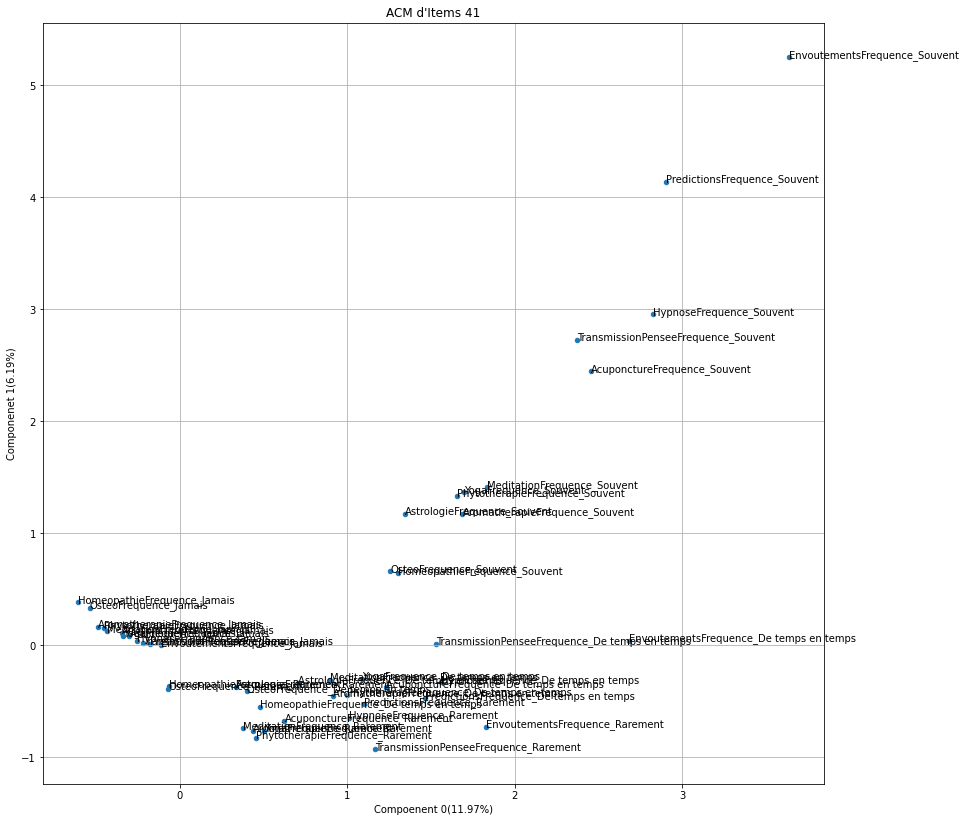

In [77]:
#ACM Items 41

#create scatter plot
plt.rcParams['figure.figsize'] = [14, 14]
x= acm_v41['Compoenent 0(11.97%)']
y= acm_v41['Componenet 1(6.19%)']
ax = acm_v41.plot(kind='scatter', x='Compoenent 0(11.97%)', y='Componenet 1(6.19%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v41['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 41")    

In [78]:
# Items 42: Dans quelle mesure prenez-vous ces pratiques et leurs effets au sérieux ?
Items42 =['AcuponctureFrequence2', 'PhytotherapieFrequence2', 'MeditationFrequence2'
          , 'HypnoseFrequence2', 'AstrologieFrequence2', 'HomeopathieFrequence2'
          , 'AromatherapieFrequence2', 'TransmissionPenseeFrequence2', 'PredictionsFrequence2'
          , 'EnvoutementsFrequence2', 'OsteoFrequence2', 'YogaFrequence2']

In [79]:
for i in data[Items42].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout au sérieux', 'Plutôt pas au sérieux'
                                        ,'Plutôt au sérieux', 'Très au sérieux'
                                        , 'Sans opinion'] 
                                        , ordered=True)

In [83]:
# Application de l'ACM
acm_items42 = prince.MCA(n_components = 2)

acm_items42 = acm_items42.fit(data[Items42])

ax = acm_items42.plot(X=data[Items42])
ax


alt.Chart(...)

In [84]:
acm_v42 =acm_items42.column_coordinates(data[Items42])
acm_v42.rename(columns = {0:'Compoenent 0(12.98%)', 1 : 'Componenet 1(9.73%)'}, inplace = True)

acm_v42 = acm_v42.reset_index()
acm_v42.columns = ['Variable', 'Compoenent 0(12.98%)' , 'Componenet 1(9.73%)']
acm_v42

Variable  Compoenent 0(12.98%)  \
0        AcuponctureFrequence2_Pas du tout au sérieux             -0.591712   
1         AcuponctureFrequence2_Plutôt pas au sérieux             -0.412168   
2             AcuponctureFrequence2_Plutôt au sérieux             -0.198023   
3               AcuponctureFrequence2_Très au sérieux             -0.282634   
4                  AcuponctureFrequence2_Sans opinion              2.095295   
5      PhytotherapieFrequence2_Pas du tout au sérieux             -0.658444   
6       PhytotherapieFrequence2_Plutôt pas au sérieux             -0.516834   
7           PhytotherapieFrequence2_Plutôt au sérieux             -0.292692   
8             PhytotherapieFrequence2_Très au sérieux             -0.322724   
9                PhytotherapieFrequence2_Sans opinion              1.300158   
10        MeditationFrequence2_Pas du tout au sérieux             -0.513180   
11         MeditationFrequence2_Plutôt pas au sérieux             -0.471237   
12             MeditationFrequence2_Plutôt au sérieux             -0.220391   
13               MeditationFrequence2_Très au sérieux             -0.246508   
14                  MeditationFrequence2_Sans opinion              1.762494   
15           HypnoseFrequence2_Pas du tout au sérieux             -0.476439   
16            HypnoseFrequence2_Plutôt pas au sérieux             -0.383658   
17                HypnoseFrequence2_Plutôt au sérieux             -0.215345   
18                  HypnoseFrequence2_Très au sérieux             -0.265172   
19                     HypnoseFrequence2_Sans opinion              1.678862   
20        AstrologieFrequence2_Pas du tout au sérieux             -0.341542   
21         AstrologieFrequence2_Plutôt pas au sérieux             -0.167281   
22             AstrologieFrequence2_Plutôt au sérieux             -0.028590   
23               AstrologieFrequence2_Très au sérieux             -0.280526   
24                  AstrologieFrequence2_Sans opinion              2.011967   
25       HomeopathieFrequence2_Pas du tout au sérieux             -0.456754   
26        HomeopathieFrequence2_Plutôt pas au sérieux             -0.405665   
27            HomeopathieFrequence2_Plutôt au sérieux             -0.120686   
28              HomeopathieFrequence2_Très au sérieux             -0.242849   
29                 HomeopathieFrequence2_Sans opinion              2.120753   
30     AromatherapieFrequence2_Pas du tout au sérieux             -0.578905   
31      AromatherapieFrequence2_Plutôt pas au sérieux             -0.476838   
32          AromatherapieFrequence2_Plutôt au sérieux             -0.250114   
33            AromatherapieFrequence2_Très au sérieux             -0.316315   
34               AromatherapieFrequence2_Sans opinion              1.456159   
35  TransmissionPenseeFrequence2_Pas du tout au sé...             -0.380769   
36  TransmissionPenseeFrequence2_Plutôt pas au sér...             -0.357193   
37     TransmissionPenseeFrequence2_Plutôt au sérieux             -0.196539   
38       TransmissionPenseeFrequence2_Très au sérieux             -0.310863   
39          TransmissionPenseeFrequence2_Sans opinion              1.446119   
40       PredictionsFrequence2_Pas du tout au sérieux             -0.324135   
41        PredictionsFrequence2_Plutôt pas au sérieux             -0.239054   
42            PredictionsFrequence2_Plutôt au sérieux              0.008314   
43              PredictionsFrequence2_Très au sérieux             -0.340827   
44                 PredictionsFrequence2_Sans opinion              1.866374   
45      EnvoutementsFrequence2_Pas du tout au sérieux             -0.341763   
46       EnvoutementsFrequence2_Plutôt pas au sérieux             -0.248539   
47           EnvoutementsFrequence2_Plutôt au sérieux             -0.251310   
48             EnvoutementsFrequence2_Très au sérieux             -0.180053   
49                EnvoutementsFrequence2_Sans opinion              1.647990   
50             O

Text(0.5, 1.0, "ACM d'Items 42")

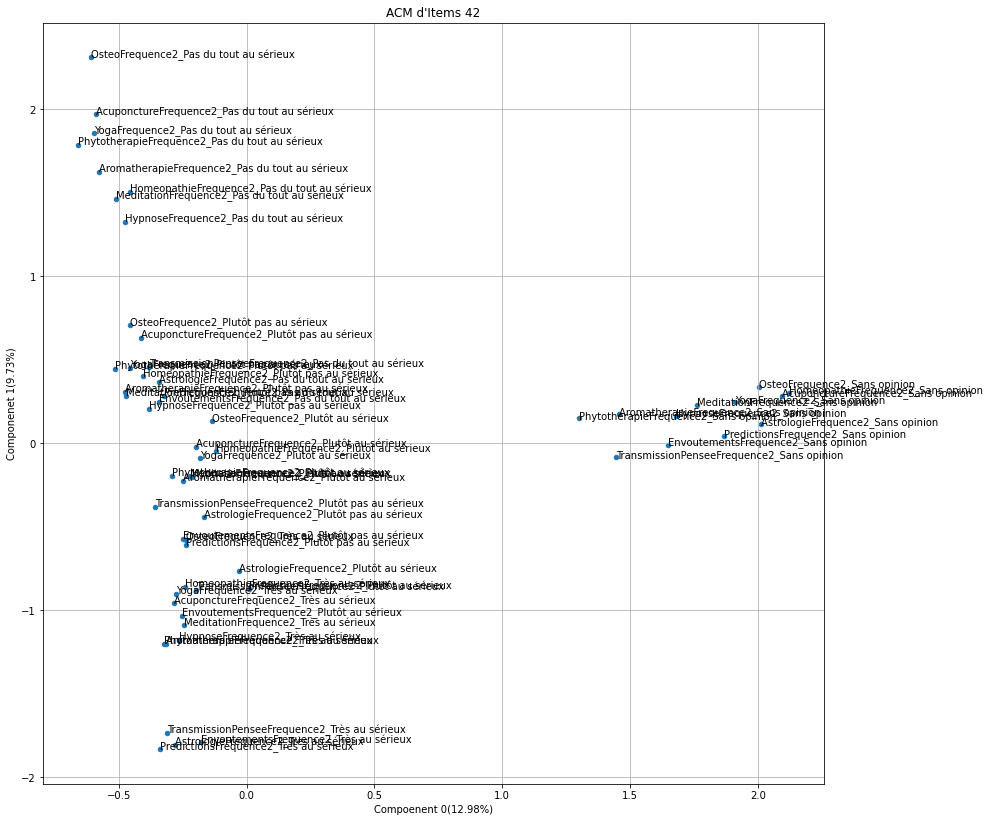

In [86]:
#ACM Items 42

#create scatter plot
plt.rcParams['figure.figsize'] = [14, 14]
x= acm_v42['Compoenent 0(12.98%)']
y= acm_v42['Componenet 1(9.73%)']
ax = acm_v42.plot(kind='scatter', x='Compoenent 0(12.98%)', y='Componenet 1(9.73%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v42['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 42")    

In [87]:
# Analyse de l'ACM d'Items42 sans les 'Sans opinion'
Items42_sansopinion = data[Items42]

Items42_sans_sansopinion = Items42_sansopinion[Items42_sansopinion.isin(['Pas du tout au sérieux', 'Plutôt pas au sérieux'
                                        ,'Plutôt au sérieux', 'Très au sérieux'])]

Items42_sans_sansopinion

AcuponctureFrequence2 PhytotherapieFrequence2    MeditationFrequence2  \
0        Plutôt au sérieux         Très au sérieux         Très au sérieux   
1          Très au sérieux         Très au sérieux         Très au sérieux   
2        Plutôt au sérieux   Plutôt pas au sérieux   Plutôt pas au sérieux   
3        Plutôt au sérieux  Pas du tout au sérieux  Pas du tout au sérieux   
4                      NaN       Plutôt au sérieux       Plutôt au sérieux   
...                    ...                     ...                     ...   
3028                   NaN                     NaN       Plutôt au sérieux   
3029     Plutôt au sérieux  Pas du tout au sérieux       Plutôt au sérieux   
3030       Très au sérieux       Plutôt au sérieux       Plutôt au sérieux   
3031     Plutôt au sérieux       Plutôt au sérieux       Plutôt au sérieux   
3032     Plutôt au sérieux                     NaN                     NaN   

          HypnoseFrequence2    AstrologieFrequence2  HomeopathieFrequence2  \
0         Plutôt au sérieux   Plutôt pas au sérieux      Plutôt au sérieux   
1           Très au sérieux   Plutôt pas au sérieux        Très au sérieux   
2     Plutôt pas au sérieux  Pas du tout au sérieux      Plutôt au sérieux   
3         Plutôt au sérieux  Pas du tout au sérieux  Plutôt pas au sérieux   
4         Plutôt au sérieux   Plutôt pas au sérieux      Plutôt au sérieux   
...                     ...                     ...                    ...   
3028      Plutôt au sérieux  Pas du tout au sérieux      Plutôt au sérieux   
3029  Plutôt pas au sérieux  Pas du tout au sérieux      Plutôt au sérieux   
3030        Très au sérieux       Plutôt au sérieux        Très au sérieux   
3031      Plutôt au sérieux  Pas du tout au sérieux      Plutôt au sérieux   
3032  Plutôt pas au sérieux                     NaN      Plutôt au sérieux   

     AromatherapieFrequence2 TransmissionPenseeFrequence2  \
0            Très au sérieux            Plutôt au sérieux   
1          Plutôt au sérieux              Très au sérieux   
2      Plutôt pas au sérieux        Plutôt pas au sérieux   
3     Pas du tout au sérieux       Pas du tout au sérieux   
4      Plutôt pas au sérieux        Plutôt pas au sérieux   
...                      ...                          ...   
3028                     NaN       Pas du tout au sérieux   
3029       Plutôt au sérieux        Plutôt pas au sérieux   
3030       Plutôt au sérieux                          NaN   
3031       Plutôt au sérieux            Plutôt au sérieux   
3032                     NaN       Pas du tout au sérieux   

       PredictionsFrequence2  EnvoutementsFrequence2    OsteoFrequence2  \
0     Pas du tout au sérieux       Plutôt au sérieux    Très au sérieux   
1     Pas du tout au sérieux  Pas du tout au sérieux    Très au sérieux   
2     Pas du tout au sérieux  Pas du tout au sérieux    Très au sérieux   
3     Pas du tout au sérieux  Pas du tout au sérieux    Très au sérieux   
4      Plutôt pas au sérieux  Pas du tout au sérieux  Plutôt au sérieux   
...                      ...                     ...                ...   
3028  Pas du tout au sérieux                     NaN  Plutôt au sérieux   
3029  Pas du tout au sérieux  Pas du tout au sérieux  Plutôt au sérieux   
3030   Plutôt pas au sérieux   Plutôt pas au sérieux  Plutôt au sérieux   
3031  Pas du tout au sérieux  Pas du tout au sérieux  Plutôt au sérieux   
3032                     NaN  Pas du tout au sérieux  Plutôt au sérieux   

              YogaFrequence2  
0          Plutôt au sérieux  
1            Très au sérieux  
2          Plutôt au sérieux  
3     Pas du tout au sérieux  
4          Plutôt au sérieux  
...                      ...  
3028       Plutôt au sérieux  
3029       Plutôt au sérieux  
3030       Plutôt au sérieux  
3031       Plutôt au sérieux  
3032       Plutôt au sérieux  

[3033 rows x 12 columns]

In [88]:
Items42_sans_sansopinion.isna().sum()

AcuponctureFrequence2           342
PhytotherapieFrequence2         680
MeditationFrequence2            452
HypnoseFrequence2               452
AstrologieFrequence2            349
HomeopathieFrequence2           290
AromatherapieFrequence2         583
TransmissionPenseeFrequence2    591
PredictionsFrequence2           400
EnvoutementsFrequence2          492
OsteoFrequence2                 299
YogaFrequence2                  375
dtype: int64

In [89]:
# supprimer les valeures manquantes
Items42_sans_sansopinion.dropna(inplace= True)

In [90]:
Items42_sans_sansopinion

AcuponctureFrequence2 PhytotherapieFrequence2    MeditationFrequence2  \
0        Plutôt au sérieux         Très au sérieux         Très au sérieux   
1          Très au sérieux         Très au sérieux         Très au sérieux   
2        Plutôt au sérieux   Plutôt pas au sérieux   Plutôt pas au sérieux   
3        Plutôt au sérieux  Pas du tout au sérieux  Pas du tout au sérieux   
5          Très au sérieux       Plutôt au sérieux       Plutôt au sérieux   
...                    ...                     ...                     ...   
3024       Très au sérieux         Très au sérieux         Très au sérieux   
3026       Très au sérieux         Très au sérieux         Très au sérieux   
3027       Très au sérieux       Plutôt au sérieux       Plutôt au sérieux   
3029     Plutôt au sérieux  Pas du tout au sérieux       Plutôt au sérieux   
3031     Plutôt au sérieux       Plutôt au sérieux       Plutôt au sérieux   

          HypnoseFrequence2    AstrologieFrequence2  HomeopathieFrequence2  \
0         Plutôt au sérieux   Plutôt pas au sérieux      Plutôt au sérieux   
1           Très au sérieux   Plutôt pas au sérieux        Très au sérieux   
2     Plutôt pas au sérieux  Pas du tout au sérieux      Plutôt au sérieux   
3         Plutôt au sérieux  Pas du tout au sérieux  Plutôt pas au sérieux   
5         Plutôt au sérieux  Pas du tout au sérieux      Plutôt au sérieux   
...                     ...                     ...                    ...   
3024      Plutôt au sérieux  Pas du tout au sérieux        Très au sérieux   
3026        Très au sérieux  Pas du tout au sérieux      Plutôt au sérieux   
3027      Plutôt au sérieux  Pas du tout au sérieux      Plutôt au sérieux   
3029  Plutôt pas au sérieux  Pas du tout au sérieux      Plutôt au sérieux   
3031      Plutôt au sérieux  Pas du tout au sérieux      Plutôt au sérieux   

     AromatherapieFrequence2 TransmissionPenseeFrequence2  \
0            Très au sérieux            Plutôt au sérieux   
1          Plutôt au sérieux              Très au sérieux   
2      Plutôt pas au sérieux        Plutôt pas au sérieux   
3     Pas du tout au sérieux       Pas du tout au sérieux   
5          Plutôt au sérieux       Pas du tout au sérieux   
...                      ...                          ...   
3024       Plutôt au sérieux       Pas du tout au sérieux   
3026         Très au sérieux        Plutôt pas au sérieux   
3027       Plutôt au sérieux        Plutôt pas au sérieux   
3029       Plutôt au sérieux        Plutôt pas au sérieux   
3031       Plutôt au sérieux            Plutôt au sérieux   

       PredictionsFrequence2  EnvoutementsFrequence2    OsteoFrequence2  \
0     Pas du tout au sérieux       Plutôt au sérieux    Très au sérieux   
1     Pas du tout au sérieux  Pas du tout au sérieux    Très au sérieux   
2     Pas du tout au sérieux  Pas du tout au sérieux    Très au sérieux   
3     Pas du tout au sérieux  Pas du tout au sérieux    Très au sérieux   
5     Pas du tout au sérieux  Pas du tout au sérieux    Très au sérieux   
...                      ...                     ...                ...   
3024  Pas du tout au sérieux  Pas du tout au sérieux    Très au sérieux   
3026  Pas du tout au sérieux       Plutôt au sérieux    Très au sérieux   
3027  Pas du tout au sérieux  Pas du tout au sérieux    Très au sérieux   
3029  Pas du tout au sérieux  Pas du tout au sérieux  Plutôt au sérieux   
3031  Pas du tout au sérieux  Pas du tout au sérieux  Plutôt au sérieux   

              YogaFrequence2  
0          Plutôt au sérieux  
1            Très au sérieux  
2          Plutôt au sérieux  
3     Pas du tout au sérieux  
5            Très au sérieux  
...                      ...  
3024         Très au sérieux  
3026         Très au sérieux  
3027       Plutôt au sérieux  
3029       Plutôt au sérieux  
3031       Plutôt au sérieux  

[1780 rows x 12 columns]

In [92]:
Items42_sans_sansopinion['AcuponctureFrequence2'].dtype

CategoricalDtype(categories=['Pas du tout au sérieux', 'Plutôt pas au sérieux',
                  'Plutôt au sérieux', 'Très au sérieux', 'Sans opinion'],
, ordered=True)

In [93]:
for i in Items42_sans_sansopinion.columns:
    Items42_sans_sansopinion[i] = pd.Categorical(Items42_sans_sansopinion[i], 
                            categories=['Pas du tout au sérieux', 'Plutôt pas au sérieux'
                                        ,'Plutôt au sérieux', 'Très au sérieux'] 
                                        , ordered=True)

In [94]:
# Application de l'ACM
acm_items42_sans_sansopinion = prince.MCA(n_components = 2)

acm_items42_sans_sansopinion = acm_items42_sans_sansopinion.fit(Items42_sans_sansopinion)

ax = acm_items42_sans_sansopinion.plot(X=Items42_sans_sansopinion)
ax


alt.Chart(...)

In [95]:
acm_v42_sans_sansopinion =acm_items42_sans_sansopinion.column_coordinates(Items42_sans_sansopinion)
acm_v42_sans_sansopinion.rename(columns = {0:'Compoenent 0(14.08%)', 1 : 'Componenet 1(10.53%)'}, inplace = True)

acm_v42_sans_sansopinion = acm_v42_sans_sansopinion.reset_index()
acm_v42_sans_sansopinion.columns = ['Variable', 'Compoenent 0(14.08%)' , 'Componenet 1(10.53%)']
acm_v42_sans_sansopinion

Variable  Compoenent 0(14.08%)  \
0        AcuponctureFrequence2_Pas du tout au sérieux             -1.788757   
1         AcuponctureFrequence2_Plutôt pas au sérieux             -0.631916   
2             AcuponctureFrequence2_Plutôt au sérieux              0.032753   
3               AcuponctureFrequence2_Très au sérieux              0.848187   
4      PhytotherapieFrequence2_Pas du tout au sérieux             -1.574035   
5       PhytotherapieFrequence2_Plutôt pas au sérieux             -0.376386   
6           PhytotherapieFrequence2_Plutôt au sérieux              0.167532   
7             PhytotherapieFrequence2_Très au sérieux              1.069422   
8         MeditationFrequence2_Pas du tout au sérieux             -1.383492   
9          MeditationFrequence2_Plutôt pas au sérieux             -0.241427   
10             MeditationFrequence2_Plutôt au sérieux              0.183880   
11               MeditationFrequence2_Très au sérieux              0.996871   
12           HypnoseFrequence2_Pas du tout au sérieux             -1.303736   
13            HypnoseFrequence2_Plutôt pas au sérieux             -0.210913   
14                HypnoseFrequence2_Plutôt au sérieux              0.209037   
15                  HypnoseFrequence2_Très au sérieux              1.070094   
16        AstrologieFrequence2_Pas du tout au sérieux             -0.366825   
17         AstrologieFrequence2_Plutôt pas au sérieux              0.431797   
18             AstrologieFrequence2_Plutôt au sérieux              0.843146   
19               AstrologieFrequence2_Très au sérieux              1.787624   
20       HomeopathieFrequence2_Pas du tout au sérieux             -1.473720   
21        HomeopathieFrequence2_Plutôt pas au sérieux             -0.392060   
22            HomeopathieFrequence2_Plutôt au sérieux              0.051796   
23              HomeopathieFrequence2_Très au sérieux              0.798618   
24     AromatherapieFrequence2_Pas du tout au sérieux             -1.496984   
25      AromatherapieFrequence2_Plutôt pas au sérieux             -0.252651   
26          AromatherapieFrequence2_Plutôt au sérieux              0.188313   
27            AromatherapieFrequence2_Très au sérieux              1.067480   
28  TransmissionPenseeFrequence2_Pas du tout au sé...             -0.427332   
29  TransmissionPenseeFrequence2_Plutôt pas au sér...              0.384631   
30     TransmissionPenseeFrequence2_Plutôt au sérieux              0.874296   
31       TransmissionPenseeFrequence2_Très au sérieux              1.716857   
32       PredictionsFrequence2_Pas du tout au sérieux             -0.291595   
33        PredictionsFrequence2_Plutôt pas au sérieux              0.598697   
34            PredictionsFrequence2_Plutôt au sérieux              0.948966   
35              PredictionsFrequence2_Très au sérieux              1.768200   
36      EnvoutementsFrequence2_Pas du tout au sérieux             -0.254936   
37       EnvoutementsFrequence2_Plutôt pas au sérieux              0.585683   
38           EnvoutementsFrequence2_Plutôt au sérieux              1.004584   
39             EnvoutementsFrequence2_Très au sérieux              1.983755   
40             OsteoFrequence2_Pas du tout au sérieux             -2.098197   
41              OsteoFrequence2_Plutôt pas au sérieux             -0.617456   
42                  OsteoFrequence2_Plutôt au sérieux             -0.132869   
43                    OsteoFrequence2_Très au sérieux              0.522753   
44              YogaFrequence2_Pas du tout au sérieux             -1.709929   
45               YogaFrequence2_Plutôt pas au sérieux             -0.411405   
46                   YogaFrequence2_Plutôt au sérieux              0.101328   
47                     YogaFrequence2_Très au sérieux              0.805696   

    Componenet 1(10.53%)  
0               1.366864  
1              -0.280021  
2              -0.456853  
3               0.679870  
4               1.025574  
5          

Text(0.5, 1.0, "ACM d'Items 42 sans les personnes ayant répondu sans opinion")

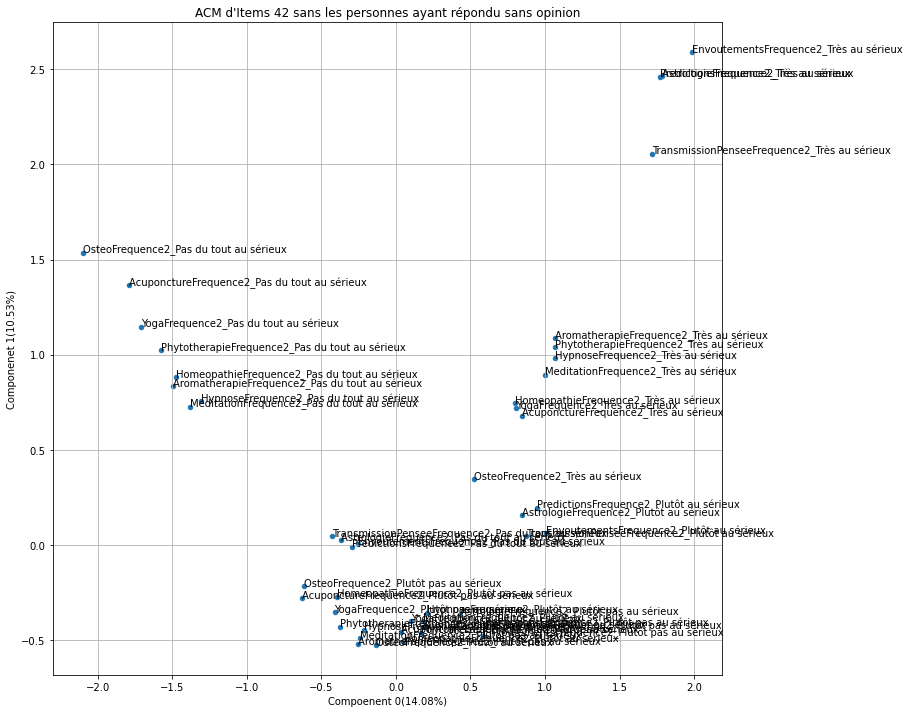

In [96]:
#ACM Items 42 sans les sans opinion

#create scatter plot
plt.rcParams['figure.figsize'] = [12, 12]
x= acm_v42_sans_sansopinion['Compoenent 0(14.08%)']
y= acm_v42_sans_sansopinion['Componenet 1(10.53%)']
ax = acm_v42_sans_sansopinion.plot(kind='scatter', x='Compoenent 0(14.08%)', y='Componenet 1(10.53%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v42_sans_sansopinion['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 42 sans les personnes ayant répondu sans opinion")   

In [97]:
# Items 44: Pour chacun des domaines suivants, indiquez à quel point vous les considérez comme scientifiques ?
Items44 = ['Biologie', 'Astronomie', 'Histoire', 'Physique', 'Horoscopes', 'Economie'
           , 'Medecine', 'Psychologie', 'Mathematiques', 'Homeopathie', 'Statistiques'
           , 'Meteorologie', 'Sociologie', 'Agronomie', 'Graphologie', 'Psychanalyse'
           , 'EtudeGenre']

In [98]:
for i in data[Items44].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=["Ce n'est pas une science", "Ca dépend des cas"
                                        , "C'est une science", "Sans opinion"] 
                                        , ordered=True)

In [99]:
# Application de l'ACM
acm_items44 = prince.MCA(n_components = 2)

acm_items44 = acm_items42.fit(data[Items44])

ax = acm_items44.plot(X=data[Items44])
ax

alt.Chart(...)

In [101]:
acm_v44 =acm_items44.column_coordinates(data[Items44])
acm_v44.rename(columns = {0:'Compoenent 0(19.35%)', 1 : 'Componenet 1(9.41%)'}, inplace = True)

acm_v44 = acm_v44.reset_index()
acm_v44.columns = ['Variable', 'Compoenent 0(19.35%)' , 'Componenet 1(9.41%)']
acm_v44

Variable  Compoenent 0(19.35%)  \
0     Biologie_Ce n'est pas une science             -0.016893   
1            Biologie_Ca dépend des cas              0.170438   
2            Biologie_C'est une science             -0.214350   
3                 Biologie_Sans opinion              3.683796   
4   Astronomie_Ce n'est pas une science             -0.083129   
..                                  ...                   ...   
63            Psychanalyse_Sans opinion              2.561085   
64  EtudeGenre_Ce n'est pas une science             -0.213312   
65         EtudeGenre_Ca dépend des cas             -0.248548   
66         EtudeGenre_C'est une science             -0.303216   
67              EtudeGenre_Sans opinion              1.945482   

    Componenet 1(9.41%)  
0              2.401040  
1              1.276679  
2             -0.175694  
3             -0.191518  
4              1.175475  
..                  ...  
63            -0.087490  
64             0.778132  
65            -0.005151  
66            -0.673814  
67            -0.143276  

[68 rows x 3 columns]

Text(0.5, 1.0, "ACM d'Items 44")

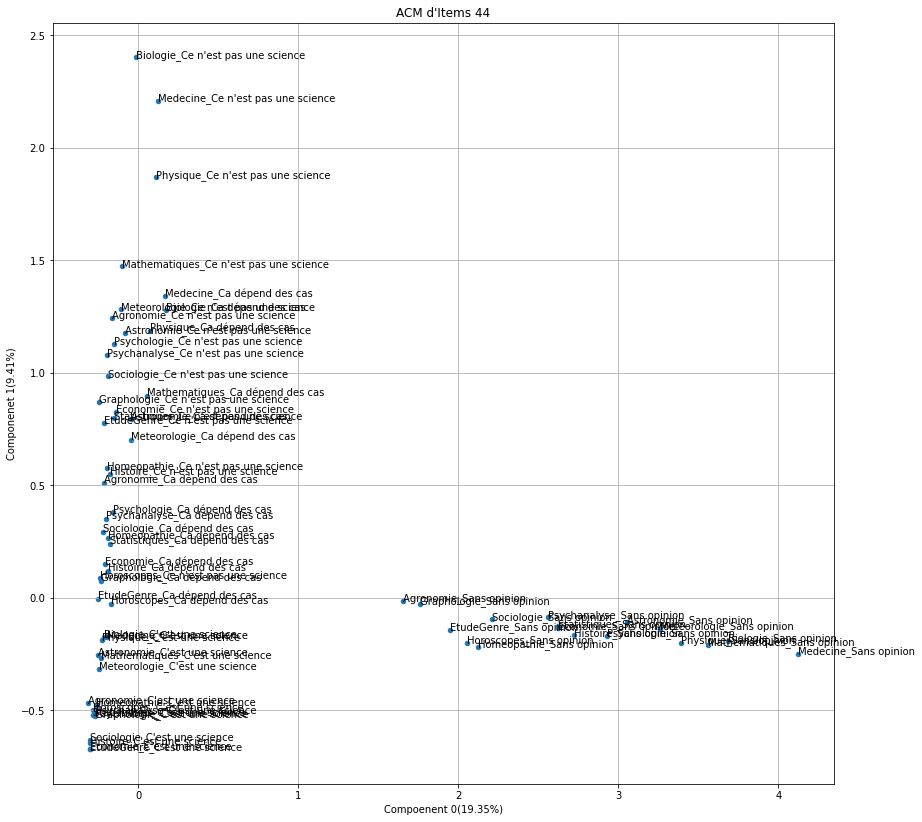

In [102]:
#ACM Items 44

#create scatter plot
plt.rcParams['figure.figsize'] = [14, 14]
x= acm_v44['Compoenent 0(19.35%)']
y= acm_v44['Componenet 1(9.41%)']
ax = acm_v44.plot(kind='scatter', x='Compoenent 0(19.35%)', y='Componenet 1(9.41%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v44['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 44")

In [111]:
# Analyse de l'ACM d'Items44 sans les 'Sans opinion'
Items44_sansopinion = data[Items44]

Items44_sans_sansopinion = Items44_sansopinion[Items44_sansopinion.isin(["Ce n'est pas une science", "Ca dépend des cas"
                                        , "C'est une science"])]


In [112]:
Items44_sans_sansopinion.isna().sum()

Biologie         139
Astronomie       197
Histoire         230
Physique         160
Horoscopes       310
Economie         240
Medecine         110
Psychologie      210
Mathematiques    150
Homeopathie      289
Statistiques     236
Meteorologie     173
Sociologie       310
Agronomie        423
Graphologie      379
Psychanalyse     255
EtudeGenre       352
dtype: int64

In [113]:
# supprimer les valeures manquantes
Items44_sans_sansopinion.dropna(inplace= True)

In [114]:
Items44_sans_sansopinion

Biologie         Astronomie                  Histoire  \
0     C'est une science  C'est une science         C'est une science   
1     C'est une science  C'est une science         C'est une science   
2     C'est une science  C'est une science  Ce n'est pas une science   
3     C'est une science  C'est une science         C'est une science   
4     C'est une science  C'est une science  Ce n'est pas une science   
...                 ...                ...                       ...   
3024  C'est une science  C'est une science         C'est une science   
3026  C'est une science  C'est une science         Ca dépend des cas   
3028  C'est une science  C'est une science  Ce n'est pas une science   
3029  Ca dépend des cas  Ca dépend des cas         Ca dépend des cas   
3031  C'est une science  C'est une science  Ce n'est pas une science   

               Physique                Horoscopes                  Economie  \
0     C'est une science  Ce n'est pas une science         C'est une science   
1     C'est une science  Ce n'est pas une science         C'est une science   
2     C'est une science  Ce n'est pas une science  Ce n'est pas une science   
3     C'est une science  Ce n'est pas une science         Ca dépend des cas   
4     C'est une science  Ce n'est pas une science         C'est une science   
...                 ...                       ...                       ...   
3024  C'est une science  Ce n'est pas une science         C'est une science   
3026  C'est une science  Ce n'est pas une science         Ca dépend des cas   
3028  C'est une science  Ce n'est pas une science  Ce n'est pas une science   
3029  C'est une science  Ce n'est pas une science  Ce n'est pas une science   
3031  C'est une science  Ce n'est pas une science  Ce n'est pas une science   

               Medecine        Psychologie             Mathematiques  \
0     C'est une science  C'est une science         C'est une science   
1     C'est une science  C'est une science         C'est une science   
2     C'est une science  Ca dépend des cas         C'est une science   
3     C'est une science  C'est une science         C'est une science   
4     C'est une science  C'est une science         C'est une science   
...                 ...                ...                       ...   
3024  C'est une science  C'est une science         C'est une science   
3026  C'est une science  C'est une science         C'est une science   
3028  C'est une science  C'est une science         C'est une science   
3029  Ca dépend des cas  C'est une science         C'est une science   
3031  C'est une science  Ca dépend des cas  Ce n'est pas une science   

                   Homeopathie              Statistiques  \
0            C'est une science         C'est une science   
1            C'est une science         C'est une science   
2     Ce n'est pas une science  Ce n'est pas une science   
3            C'est une science         C'est une science   
4            C'est une science         C'est une science   
...                        ...                       ...   
3024         Ca dépend des cas         C'est une science   
3026         C'est une science         C'est une science   
3028         C'est une science  Ce n'est pas une science   
3029         Ca dépend des cas         Ca dépend des cas   
3031         Ca dépend des cas  Ce n'est pas une science   

                  Meteorologie                Sociologie  \
0            Ca dépend des cas         C'est une science   
1            C'est une science         C'est une science   
2            C'est une science         C'est une science   
3            C'est une science         C'est une science   
4            C'est une science         C'est une science   
...                        ...                       ...   
3024         C'est une science         C'est une science   
3026         C'est une science         Ca dépend des cas   
3028         C'est une science         C'est une science   
3029         C'

In [115]:
for i in Items44_sans_sansopinion.columns:
    Items44_sans_sansopinion[i] = pd.Categorical(Items44_sans_sansopinion[i], 
                            categories=["Ce n'est pas une science", "Ca dépend des cas"
                                        , "C'est une science"] 
                                        , ordered=True)

In [116]:
# Application de l'ACM
acm_items44_sans_sansopinion = prince.MCA(n_components = 2)

acm_items44_sans_sansopinion = acm_items44_sans_sansopinion.fit(Items44_sans_sansopinion)

ax = acm_items44_sans_sansopinion.plot(X=Items44_sans_sansopinion)
ax


alt.Chart(...)

In [117]:
acm_v44_sans_sansopinion =acm_items44_sans_sansopinion.column_coordinates(Items44_sans_sansopinion)
acm_v44_sans_sansopinion.rename(columns = {0:'Compoenent 0(14.72%)', 1 : 'Componenet 1(11.01%)'}, inplace = True)

acm_v44_sans_sansopinion = acm_v44_sans_sansopinion.reset_index()
acm_v44_sans_sansopinion.columns = ['Variable', 'Compoenent 0(14.72%)' , 'Componenet 1(11.01%)']
acm_v44_sans_sansopinion

Variable  Compoenent 0(14.72%)  \
0        Biologie_Ce n'est pas une science              2.527148   
1               Biologie_Ca dépend des cas              1.301464   
2               Biologie_C'est une science             -0.169995   
3      Astronomie_Ce n'est pas une science              1.295615   
4             Astronomie_Ca dépend des cas              0.736759   
5             Astronomie_C'est une science             -0.240534   
6        Histoire_Ce n'est pas une science              0.579851   
7               Histoire_Ca dépend des cas              0.076913   
8               Histoire_C'est une science             -0.619700   
9        Physique_Ce n'est pas une science              2.126907   
10              Physique_Ca dépend des cas              1.180016   
11              Physique_C'est une science             -0.173020   
12     Horoscopes_Ce n'est pas une science              0.072652   
13            Horoscopes_Ca dépend des cas             -0.086858   
14            Horoscopes_C'est une science             -0.523140   
15       Economie_Ce n'est pas une science              0.865362   
16              Economie_Ca dépend des cas              0.103294   
17              Economie_C'est une science             -0.628411   
18       Medecine_Ce n'est pas une science              2.590418   
19              Medecine_Ca dépend des cas              1.413422   
20              Medecine_C'est une science             -0.175238   
21    Psychologie_Ce n'est pas une science              1.166019   
22           Psychologie_Ca dépend des cas              0.324773   
23           Psychologie_C'est une science             -0.500068   
24  Mathematiques_Ce n'est pas une science              1.497246   
25         Mathematiques_Ca dépend des cas              0.905294   
26         Mathematiques_C'est une science             -0.253344   
27    Homeopathie_Ce n'est pas une science              0.561060   
28           Homeopathie_Ca dépend des cas              0.211014   
29           Homeopathie_C'est une science             -0.465618   
30   Statistiques_Ce n'est pas une science              0.787752   
31          Statistiques_Ca dépend des cas              0.247487   
32          Statistiques_C'est une science             -0.507796   
33   Meteorologie_Ce n'est pas une science              1.379032   
34          Meteorologie_Ca dépend des cas              0.661584   
35          Meteorologie_C'est une science             -0.303193   
36     Sociologie_Ce n'est pas une science              0.998321   
37            Sociologie_Ca dépend des cas              0.244193   
38            Sociologie_C'est une science             -0.598722   
39      Agronomie_Ce n'est pas une science              1.260057   
40             Agronomie_Ca dépend des cas              0.455311   
41             Agronomie_C'est une science             -0.436102   
42    Graphologie_Ce n'est pas une science              0.880509   
43           Graphologie_Ca dépend des cas              0.055544   
44           Graphologie_C'est une science             -0.526339   
45   Psychanalyse_Ce n'est pas une science              1.095179   
46          Psychanalyse_Ca dépend des cas              0.299953   
47          Psychanalyse_C'est une science             -0.487947   
48     EtudeGenre_Ce n'est pas une science              0.766448   
49            EtudeGenre_Ca dépend des cas             -0.039746   
50            EtudeGenre_C'est une science             -0.655585   

    Componenet 1(11.01%)  
0              -1.399786  
1               1.655405  
2              -0.095245  
3              -0.548400  
4               1.298929  
5              -0.130751  
6              -0.467898  
7               0.768740  
8              -0.098379  
9              -1.501624  
10              1.571211  
11             -0.089916  
12             -0.144272  
13              0.827460  
14             -0.029615  
15             -0.518084  
16              0.732047  
17         

Text(0.5, 1.0, "ACM d'Items 44 sans les personnes ayant répondu sans opinion")

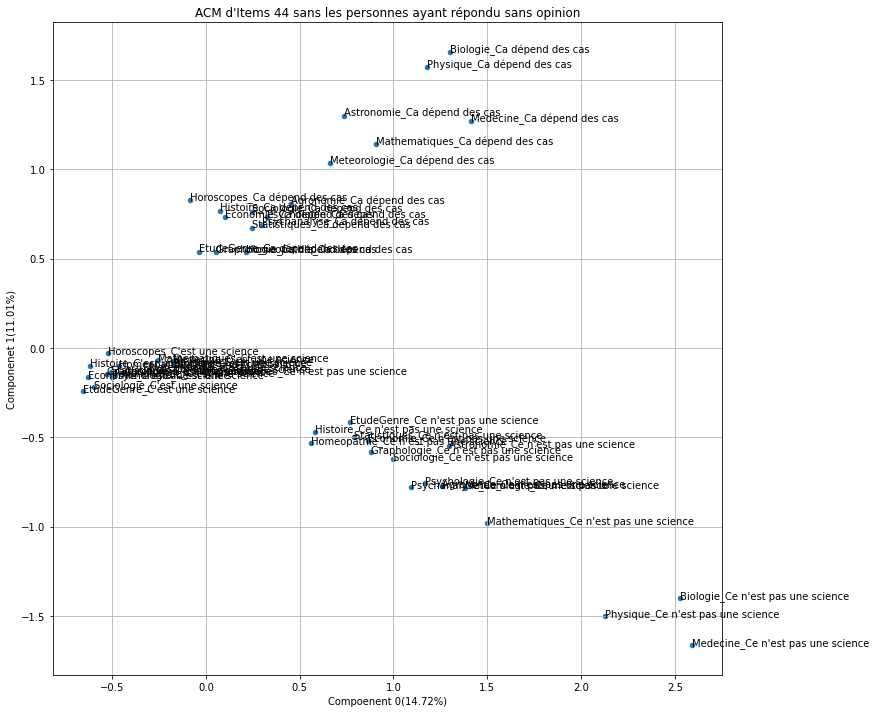

In [118]:
#ACM Items 44 sans les sans opinion

#create scatter plot
plt.rcParams['figure.figsize'] = [12, 12]
x= acm_v44_sans_sansopinion['Compoenent 0(14.72%)']
y= acm_v44_sans_sansopinion['Componenet 1(11.01%)']
ax = acm_v44_sans_sansopinion.plot(kind='scatter', x='Compoenent 0(14.72%)', y='Componenet 1(11.01%)')
plt.grid()

#label each point in scatter plot
annotations = acm_v44_sans_sansopinion['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM d'Items 44 sans les personnes ayant répondu sans opinion")   